# **Import Library**

In [548]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import normaltest
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer

import category_encoders as ce
from imblearn.pipeline import Pipeline

warnings.filterwarnings('ignore')


# **1. Business Problem Understanding**

## **A. Context**
Pada tahun 1990, pemerintah melakukan sensus di California untuk memahami harga rumah di setiap daerah. Lonjakan besar dalam transaksi jual beli rumah menciptakan kebutuhan yang tinggi akan penilaian harga rumah (home appraisal) untuk menentukan nilai jual yang tepat. Data sensus ini membantu pemerintah dalam mengumpulkan informasi yang akurat untuk analisis dan pengambilan keputusan terkait pasar perumahan di berbagai wilayah California.

"In the front yards of many towns along California's coast, 'For Sale' signs have become as common as palm trees, and for some sellers they appear to be permanent fixtures. After years of stunning price increases and demand so strong that homes sold within hours of being listed, California's giant real estate market has slowed drastically" .

Source: <a href="https://www.nytimes.com/1990/08/29/business/california-sees-housing-boom-become-slump.html">New York Times</a> 

## **B .Problem Statement**

Terjadi penjualan rumah secara masif di California yang menyebabkan agensi properti perlu memperkerjakan lebih banyak home appraisal, tapi untuk mempekerjakan seorang home appraisal akan menjadi sebuah cost di perusahaan dan akan merugikan jika permintaan untuk memvaluasi sebuah rumah sudah tidak sebanyak sekarang yang akan berujung memecat orang tersebut.

Permasalahan ini menuntut perusahaan untuk mengembangkan sebuah machine learning untuk memprediksi harga median di sebuah distrik California, sehingga perusahaan:

1. **Mengurangi Pengeluaran :** Berdasarkan <a href="https://www.houzeo.com/blog/how-much-is-a-home-appraisal-in-california/#:~:text=What%20Is%20the%20Cost%20of,spend%20nearly%20%24700%2D%241000">Houzeo</a> biaya yang diperlukan dari seorang home appraisal mencapai $1000 USD untuk setiap rumah, hal tersebut membuat perusahaan ingin membuat biaya yang diperlukan untuk menentukan valuasi rumah menjadi lebih murah

2. **Penentuan Harga yang Tepat :** Memastikan harga jual rumah tidak terlalu mahal ataupun terlalu murah untuk menarik pembeli tanpa mengorbankan margin keuntungan

3. **Efisiensi Proses :** Berdasarkan <a href="https://www.rocketmortgage.com/learn/how-long-does-an-appraisal-take">Rokcet Mortage</a> waktu yang diperlukan untuk memvaluasi suatu rumah adalah 6-20 hari kerja, hal ini menjadi hambatan waktu bagi perusahaan untuk mejual sebuah rumah

## **C. Goals**

Berdasarkan masalah yang ada, perusahaan menghire seorang data scientist untuk dapat menyelsaikan permasalahan yang ada dengan membuat suatu model yang dapat digunakan untuk melakukan prediksi suatu harga rumah, sehingga dapat menyelsaikan:
1. Biaya yang dikeluarkan dalam menggunakan machine learning dapat jauh lebih murah dibandingkan menggunakan home appraisal
2. Memberikan predisi harga dengan tikat error yang sekecil mungkin
3. Waktu yang diperlukan untuk menghitung valuasi suatu rumah menjadi instant



## **D. Analytic Approach**

1. Data Understanding and Collection:

- Sourcing Data: Mengumpulkan data historis terkait harga rumah di California yang diperlukan.
- Exploratory Data Analysis (EDA): Melakukan analisis eksploratif untuk memahami distribusi, tren, dan pola dalam data. Ini termasuk analisis statistik dasar dan visualisasi data untuk mengidentifikasi outliers, missing values, dan hubungan antar fitur.

2. Data Preprocessing:

- Data Cleaning: Mengatasi missing values, mengoreksi kesalahan data, dan menghapus outliers yang tidak wajar.
- Feature Engineering: Membuat fitur baru yang relevan dan mengonversi fitur kategorikal menjadi format yang dapat digunakan oleh algoritma machine learning, seperti one-hot encoding untuk fitur seperti ocean_proximity.
- Scaling and Normalization: Menormalkan data untuk memastikan semua fitur berada dalam skala yang sama, sehingga model dapat belajar dengan lebih efektif.

3. Model Development:

- Model Selection: Memilih beberapa algoritma machine learning yang sesuai untuk masalah regresi, seperti Linear Regression, Decision Tree, Random Forest, dan Gradient Boosting.
- Model Training: Melatih model menggunakan data yang telah diproses, dengan membagi data menjadi set pelatihan dan set pengujian untuk menghindari overfitting.
- Hyperparameter Tuning: Mengoptimalkan hyperparameters dari model menggunakan teknik seperti Grid Search atau Random Search untuk meningkatkan kinerja model.

4. Model Evaluation:

- Performance Metrics: Menggunakan metrik evaluasi seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Mean Absolute Percentage Error (MAPE) untuk menilai kinerja model.
- Cross-Validation: Melakukan cross-validation untuk memastikan model memiliki generalisasi yang baik dan tidak overfitting terhadap data pelatihan.

5. Model Deployment:

- Deployment Strategy: Mengintegrasikan model ke dalam sistem perusahaan, memungkinkan pengguna untuk memasukkan data rumah dan mendapatkan prediksi harga secara real-time.
- Monitoring and Maintenance: Mengatur sistem monitoring untuk melacak kinerja model setelah deployment dan melakukan pembaruan model secara berkala berdasarkan data baru.

6. Business Integration:

- Cost-Benefit Analysis: Melakukan analisis cost-benefit untuk memastikan bahwa penerapan model machine learning lebih ekonomis dibandingkan metode tradisional.
- Stakeholder Training: Melatih pengguna akhir dan stakeholders tentang cara menggunakan model prediksi dan menginterpretasikan hasilnya.

## **E. Metric Evaluation**

Pada tujuan terkait permasalahan yang ada adalah membuat model yang akurat untuk memprediksi harga suatu rumah dengan begitu terdapat konskuensi yang dapat merugikan semua pihak jika harga yang diprediksi itu salah, baik underprice maupun overprice.

Hal tersebut membuat, perusahaan properti ingin mendapatkan suatu model yang memiliki peresntase tingkat error serendah mungkin untuk meminimalisir kesalahan prediksi yang dilakukan, oleh karena itu metric utama yang digunakan dalam membuat model adalah MAPE (Mean Absolute Percetange Error)

Berdasarkan <a href="https://dqlab.id/kriteria-jenis-teknik-analisis-data-dalam-forecasting">DQLab</a> Metode Mean Absolute Percentage Error (MAPE) memberikan informasi seberapa besar kesalahan peramalan dibandingkan dengan nilai sebenarnya dari series tersebut. Semakin kecil nilai presentasi kesalahan (percentage error) pada MAPE maka semakin akurat hasil peramalan tersebut. Beberapa analisa menyebutkan variasi nilai Mean Absolute Percentage Error memiliki arti yang berbeda.

# **2. Data Understanding**
- Dataset merupakan data sensus California pada tahun 1990
- Setiap baris data merepresentasikan informasi terkait suatu distrik di California

`Loading Dataset`

In [549]:
data = pd.read_csv('data_california_house.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

`Attribute Information`

In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Insight**
- Terdapat 14448 Data dan 10 Kolom
- Terdapat missing value pada kolom 'total_bedrooms'

`Initial Assesment`

In [551]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

feature data_type      null  negative  n_unique  \
0           longitude   float64  0.000000     False       806   
1            latitude   float64  0.000000     False       836   
2  housing_median_age   float64  0.000000     False        52   
3         total_rooms   float64  0.000000     False      5227   
4      total_bedrooms   float64  0.948228     False      1748   
5          population   float64  0.000000     False      3498   
6          households   float64  0.000000     False      1649   
7       median_income   float64  0.000000     False      9797   
8     ocean_proximity    object  0.000000     False         5   
9  median_house_value   float64  0.000000     False      3548   

                                       sample_unique  
0  [-119.79, -122.21, -118.04, -118.28, -119.81, ...  
1  [36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6...  
2  [52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0...  
3  [112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0...  
4  [28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14...  
5  [193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ...  
6  [40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14...  
7  [1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8...  
8  [INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]  
9  [47500.0, 100000.0, 285800.0, 175000.0, 59200....

`Descriptive Statistic`

In [552]:
display(data.describe(), data.describe(include='object'))

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

ocean_proximity
count            14448
unique               5
top          <1H OCEAN
freq              6369

**Insight**
- `housing_median_age :` Median umur rumah di suatu distrik memiliki range 1-52 tahun
- `total_rooms :` Total ruangan di California memiliki median di 2.125 kamar
- `total_bedrooms :` Total kamar tidur di California memiliki median di 435 kamar
- `population :` Total populasi setiap distrik memiliki range 3-35.682 orang
- `households :` Total rumah tangga di setiap distrik memiliki range 1-6.082 rumah tangga
- `median_income :` Median pendapatan di setiap distrik memiliki range 0.4999-15 (puluhan ribu USD $)
- `ocean_proximity :` Terdapat 5 jenis kategori distrik terhadap kedekatannya ke laut
- `median_house_value :` Median harga rumah di setiap distrik memiliki range harga 14.999-500.001 USD

# **3. Exploratory Data Analysis**

## **A. Numerical Variables**

`Data Disribution`

In [553]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object', 'bool']]

In [554]:
dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = 'Normally Distributed'
    else:
        distribution = 'Not Normally Distributed'
        
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-Value', 'Distributed'])
dist_df

Feature  D'Agostino-Pearson Statistic        P-Value  \
0           longitude                 174553.467323   0.000000e+00   
1            latitude                   6624.317694   0.000000e+00   
2  housing_median_age                   1211.288946  9.374486e-264   
3         total_rooms                  12451.568831   0.000000e+00   
4      total_bedrooms                  10749.299176   0.000000e+00   
5          population                  16394.063880   0.000000e+00   
6          households                  10796.786112   0.000000e+00   
7       median_income                   4892.510603   0.000000e+00   
8  median_house_value                   1715.724618   0.000000e+00   

                Distributed  
0  Not Normally Distributed  
1  Not Normally Distributed  
2  Not Normally Distributed  
3  Not Normally Distributed  
4  Not Normally Distributed  
5  Not Normally Distributed  
6  Not Normally Distributed  
7  Not Normally Distributed  
8  Not Normally Distributed

Semua kolom pada dataset ini tidak terdistribusi normal

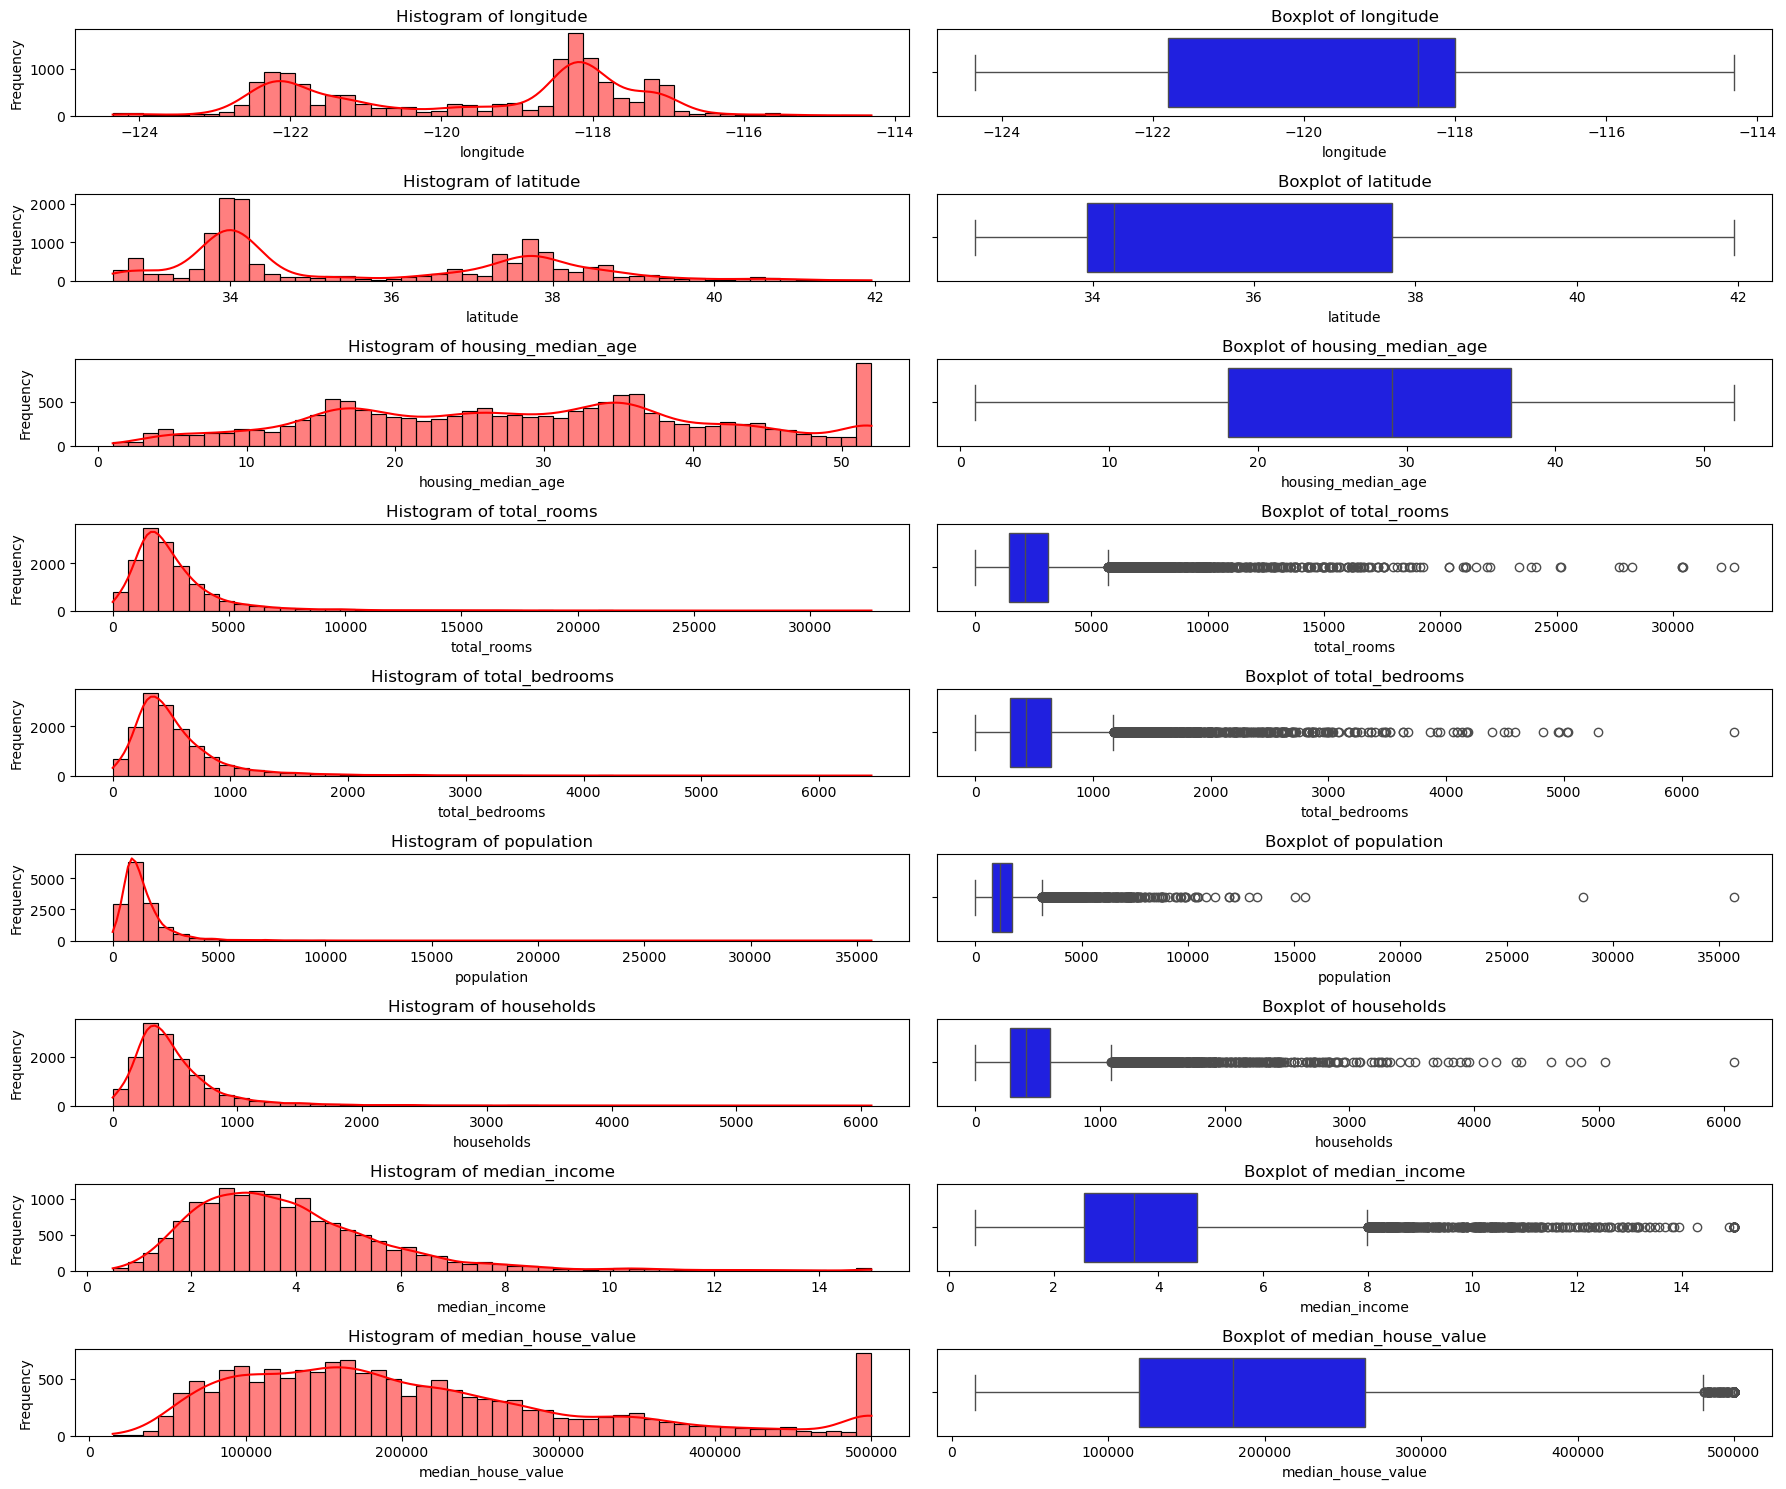

In [555]:
plt.figure(figsize=(18,15))

for index, col in enumerate(numerical):
    
    # Membuat Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='r', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(len(numerical), 2, index *2 + 2)
    sns.boxplot(x=data[col], color='blue')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Distribusi data pada setiap kolom cenderung memiliki right skewed, yang dimana memiliki nilai ekstrem dalam persebaran data.

`Geografi Plot`

In [556]:
''' Plot Two Geopandas Plots Side by Side '''
def plotTwo(df,lst):
    
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)
    
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
    proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    ii=-1
    fig,ax = plt.subplots(1,2,figsize=(21,6),subplot_kw={'projection': proj})
    for i in lst:

        ii+=1
        tgdf = gdf.sort_values(by=i,ascending=True) 
        gplt.polyplot(cali,projection=proj,ax=ax[ii]) # the module already has california 
        gplt.pointplot(tgdf,ax=ax[ii],hue=i,cmap='viridis',legend=True,alpha=1.0,s=3) # 
        ax[ii].set_title(i)

    plt.tight_layout()
    plt.subplots_adjust(wspace=-0.5)

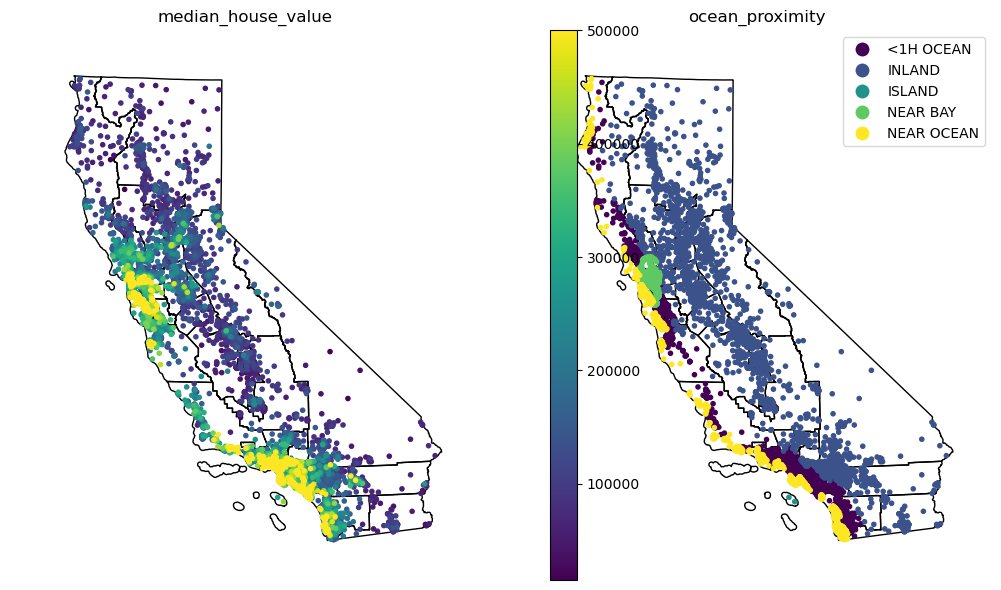

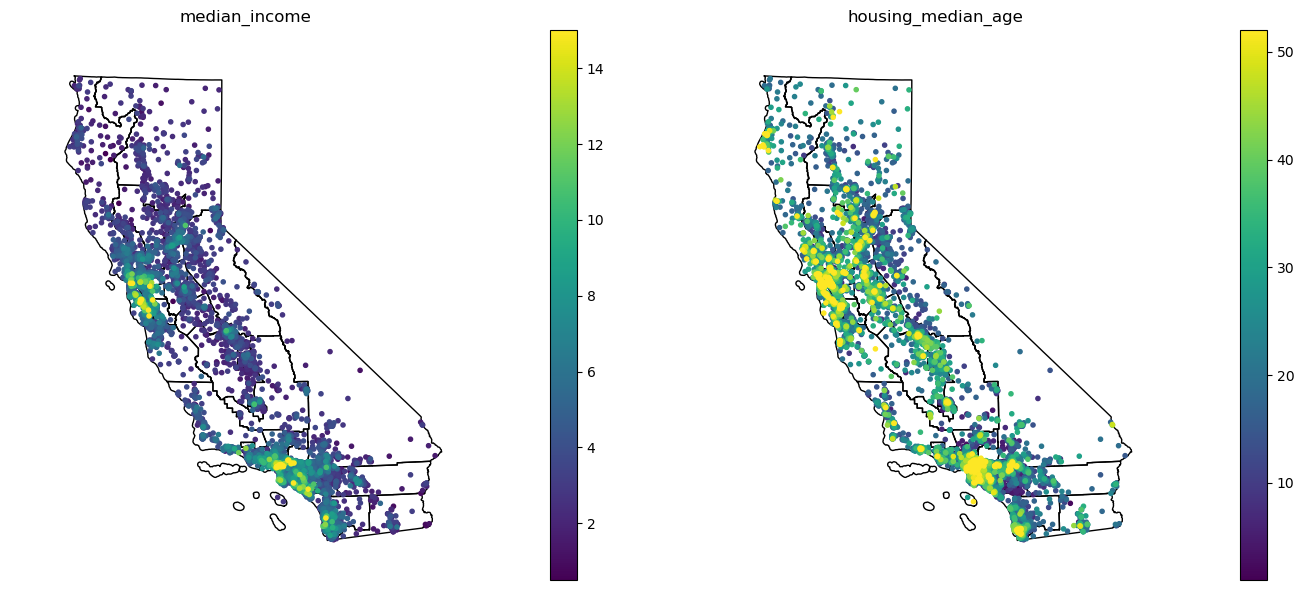

In [557]:
plotTwo(data,['median_house_value','ocean_proximity'])
plotTwo(data,['median_income','housing_median_age'])

**Insight :**
1. Median harga rumah cenderung semakin tinggi jika mendekati laut
2. Tidak terdapat anomali dalam pengelompokan ocean proximity
3. Median income cenderung semakin tinggi jika mendekati laut
4. Median umur rumah didominasi oleh rumah yang berumur lebih dari 40 tahun

**Insight**
- Ocean proximity memiliki pengaruh terhadap median harga rumah di suatu distrik

`Correlation`

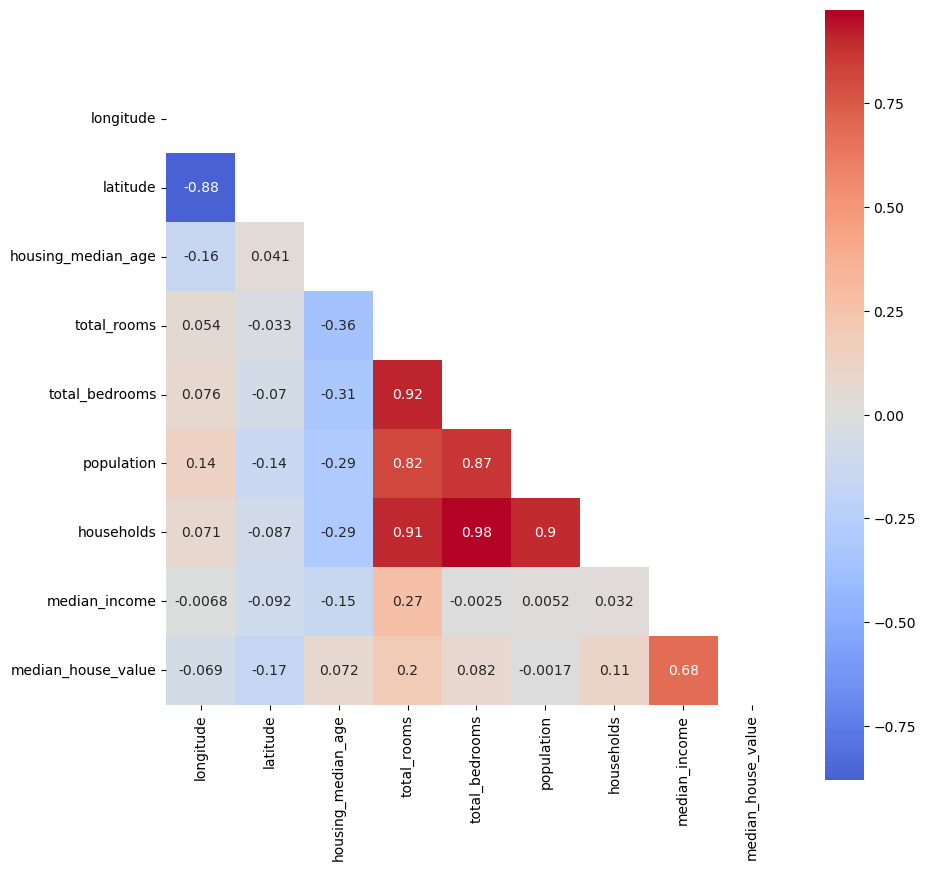

In [558]:
plt.figure(figsize=(10, 10))

matrix = np.triu(data[numerical].corr(method='spearman')) # Karena tidak terdistribusi normal
sns.heatmap(data=data[numerical].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask=matrix, square='True')
plt.show()


 Value of Correlation Coeffficient | Relationship Interpretation |
| --- | --- |
| 0.000 - 0.199 | Very Weak |
| 0.200 - 0.399 | Weak |
| 0.400 - 0.599 | Moderate |
| 0.600 - 0.799 | Strong |
| 0.800 - 1.000 | Very Strong |

**Insight**
- median_house_value memiliki korelasi postif kuat terhadap fitur median_income, yang dimana hal ini menunjukan bahwa semakin tinggi median income di suatu district, maka median house value suatu district akan semakin mahal.

`Numerikal Feature vs Target`

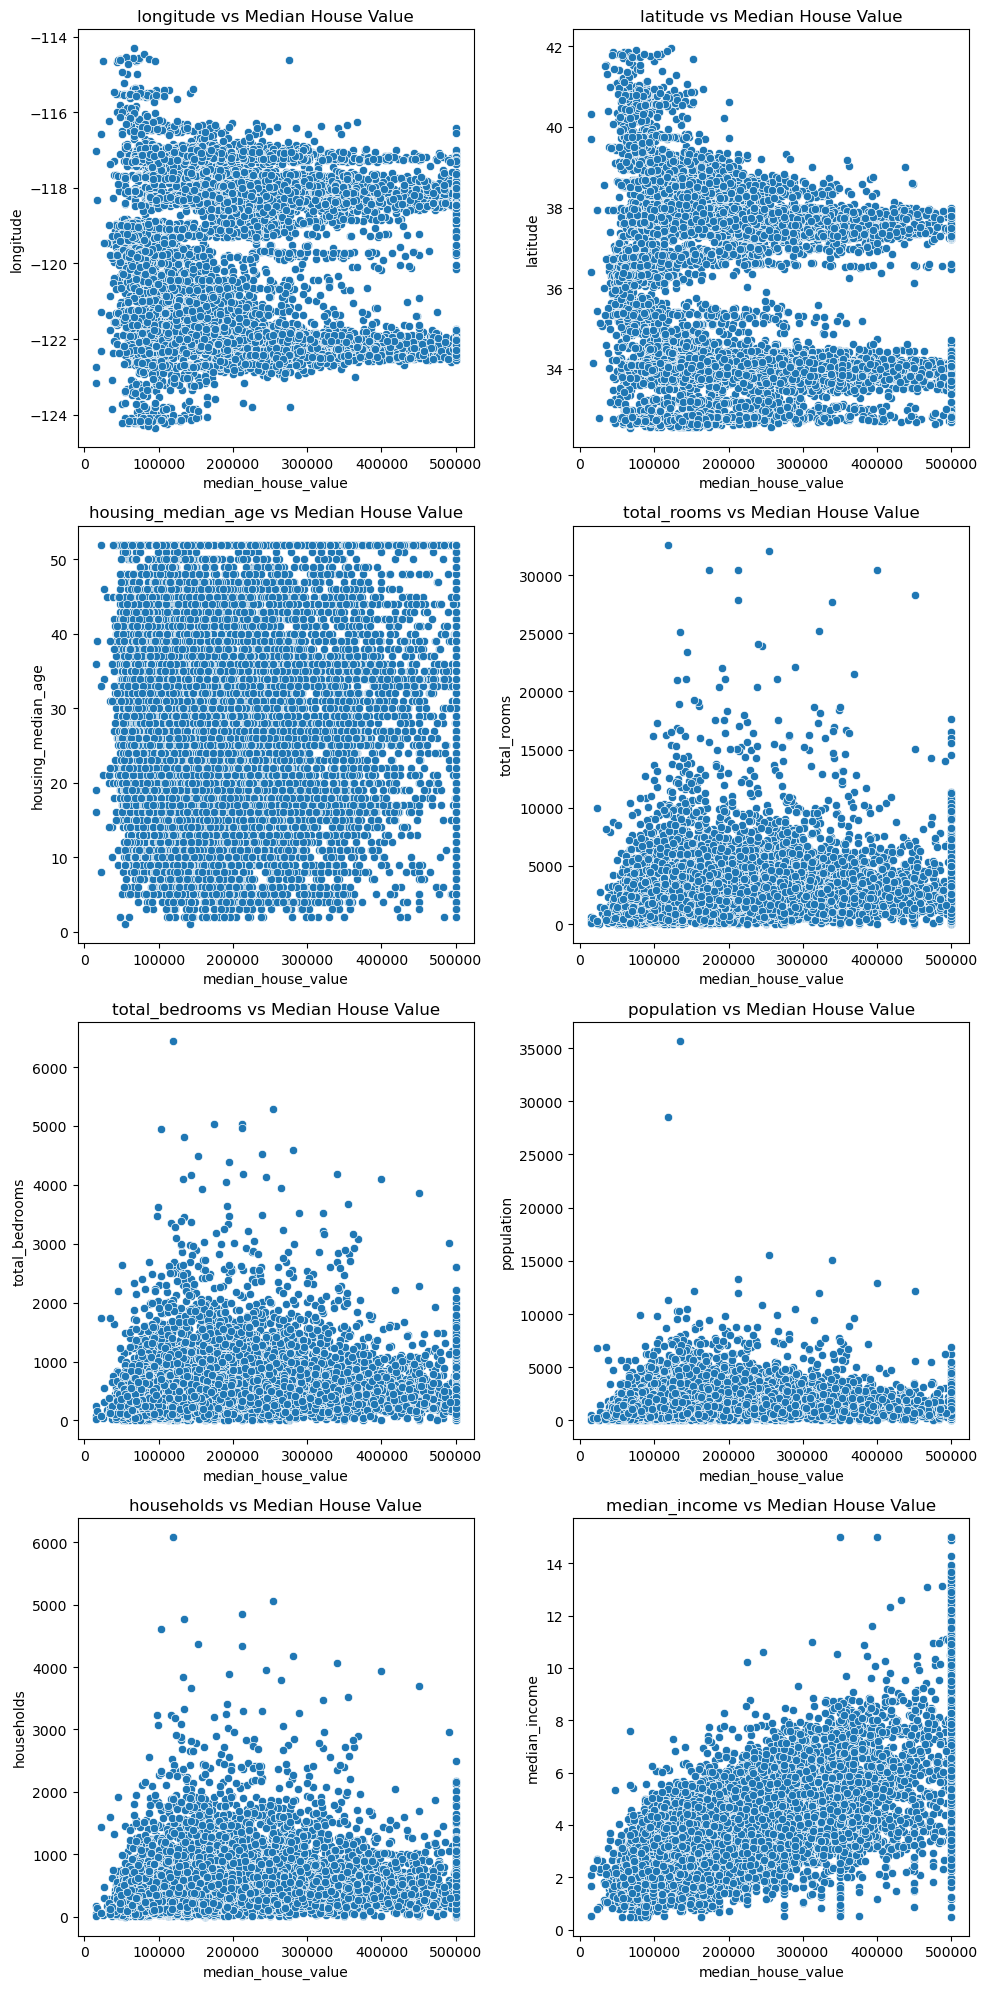

In [559]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for col, j in zip(numerical, axes.flatten()):
    ax = sns.scatterplot(data, y=col, x='median_house_value', ax = j,)
    ax.set_title(f'{col} vs Median House Value')

plt.tight_layout()
plt.show()

**Insight**
- Tidak terlihat ada hubungan dari fitur yang ada terhadap median_house_value 
- Hanya median_income yang memiliki hubungan dengan median_house_value dan itupun tidak terlalu kuat

## **B. Categorical Variables**

`Distribution`

In [560]:
order = data['ocean_proximity'].value_counts().index

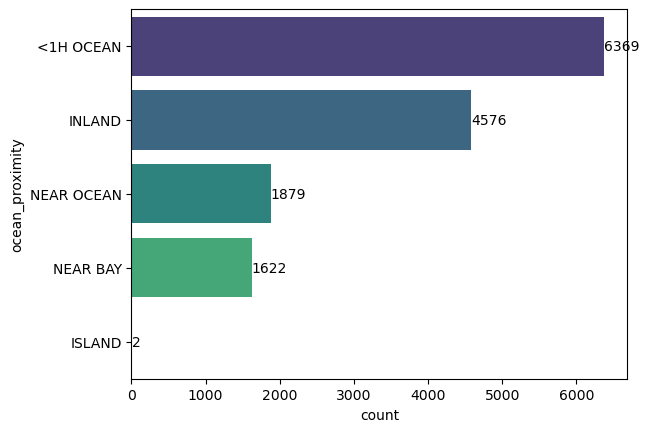

In [561]:
ax = sns.countplot(data=data, y='ocean_proximity', palette='viridis', order=order)

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

**Insight**: Terdapat 5 Jenis kategori suatu perumahan dengan kedekatan laut dan ditemukan insight bahwa:
- <1H OCEAN: Menjadi kategori paling banyak 
- ISLAND: Hanya terdapat 2 perumahan yang berada di pulau, hal tersebut membuat ML tidak dapat mempelajari data tersebut dengan baik yang dapat menyebabkan overfitting pada kategori ini, oleh karena itu lebih baik tidak dipakai (drop)

Menyimpan ulang data, setelah tidak melibatkan kategori ISLAND pada kolom ocean_proximity

In [562]:
data = data[data['ocean_proximity']!='ISLAND']

`Categorical features vs Target`

In [563]:
group_ocean = data.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False)

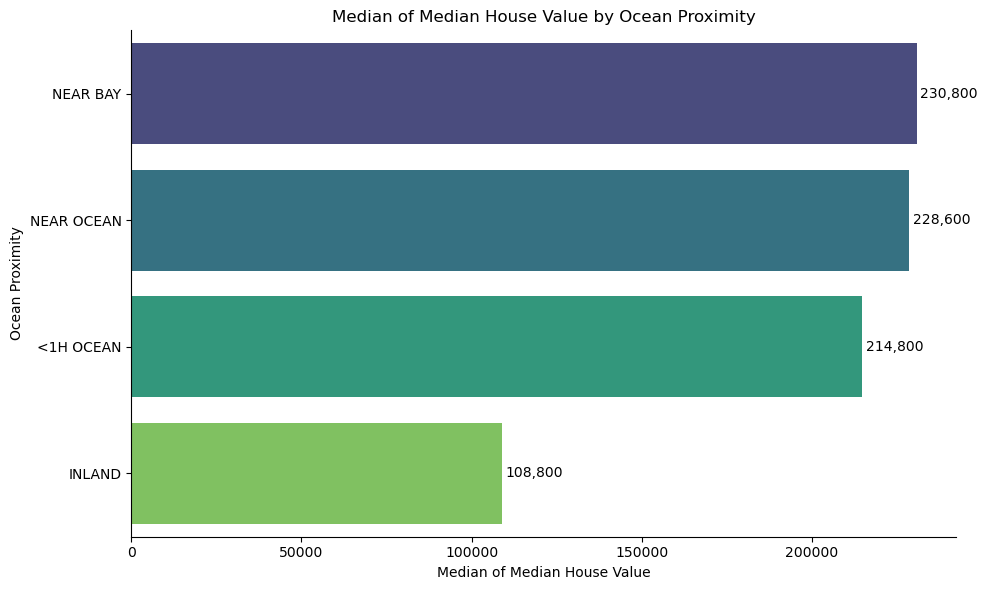

In [564]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=group_ocean.index, x=group_ocean.values, palette='viridis')

# Annotate each bar with its corresponding median house value
for i, value in enumerate(group_ocean.values):
    ax.text(value + 1000, i, f'{value:,.0f}', va='center', fontsize=10, color='black')

plt.title('Median of Median House Value by Ocean Proximity')
plt.ylabel('Ocean Proximity')
plt.xlabel('Median of Median House Value')

# Remove top and right spines
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()

In [565]:
from scipy.stats import kruskal

ocean_proximity = data['ocean_proximity'].unique()
value_by_proximity = []

for proximity  in ocean_proximity:
    value_by_proximity.append(data[data['ocean_proximity'] == proximity]['median_house_value'])

stat, pvalue = kruskal(*value_by_proximity)

alpha = 0.05

if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 ocean proximity yang berpengaruh terhadap median house value.
    ''')
else:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue <= {alpha}. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 ocean proximity yang berpengaruh terhadap median house value.
    ''')


    pvalue = 0.000. pvalue <= 0.05. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 ocean proximity yang berpengaruh terhadap median house value.
    


Jika melihat pada barplot di atas, maka dapat disimpulkan bahwa terjadi perbedaan median house value yang signifikan pada ocean proximity 'INLAND'

# **4. Data Cleaning, Feature Selection and Feature Engineering**

## **A. Check Missing Values**

<Axes: >

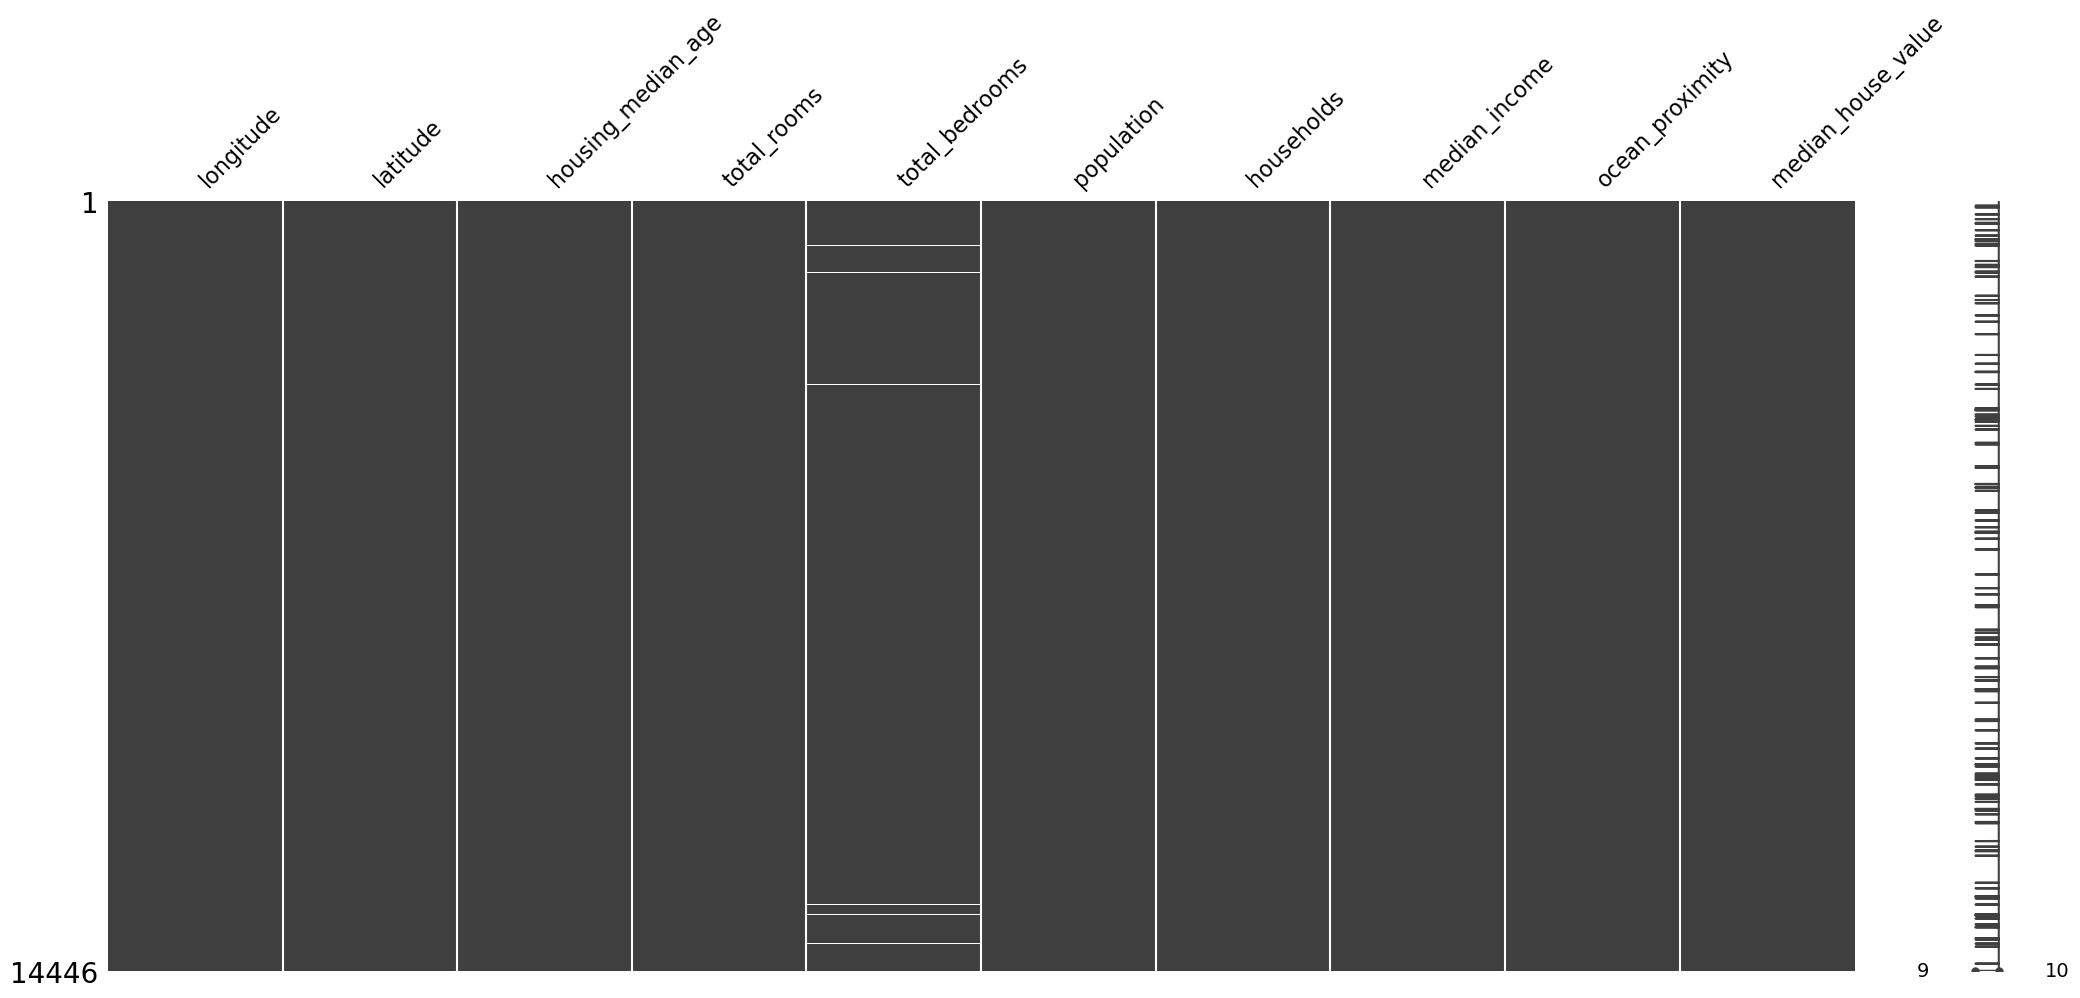

In [566]:
import missingno 

missingno.matrix(data)


`Mencari Missing Value`

In [567]:
pd.DataFrame({
    'Jumlah Missing Value': [data[col].isna().sum() for col in data.columns]
}, index=data.columns.values)

Jumlah Missing Value
longitude                              0
latitude                               0
housing_median_age                     0
total_rooms                            0
total_bedrooms                       137
population                             0
households                             0
median_income                          0
ocean_proximity                        0
median_house_value                     0

In [568]:
missing_value = data.isna().sum().sum()/len(data)*100
print(f'Persentase missing value {missing_value:.2f}%')

Persentase missing value 0.95%


`Handling Missing Value`

In [569]:
data.dropna(inplace=True)

Dikarenakan jumlah missing value kurang dari 1%, maka akan didrop

## **B. Check Data Duplicates**

`Mencari Data Duplikat`

In [570]:
data.duplicated().sum()

0

Tidak terdapat duplikat pada data

## **C. Replace Value**

In [571]:
data.nunique()

longitude              806
latitude               835
housing_median_age      52
total_rooms           5212
total_bedrooms        1748
population            3491
households            1646
median_income         9726
ocean_proximity          4
median_house_value    3540
dtype: int64

`Merubah value housing_median_age`

Nilai unik pada 'housing_median_age' tidak terlalu banyak, maka akan dicek apakah ada value yang nilainya sedikit (rare label)

In [572]:
data['housing_median_age'].value_counts().sort_values().head()

housing_median_age
1.0      2
51.0    36
2.0     37
3.0     45
49.0    92
Name: count, dtype: int64

In [573]:
data['housing_median_age'].value_counts().sort_index().head()

housing_median_age
1.0      2
2.0     37
3.0     45
4.0    138
5.0    182
Name: count, dtype: int64

Dikarenakan hanya ada 2 rumah berumur 1 tahun, maka saya memutuskan membuatnya menjadi 2 tahun.

In [574]:
data['housing_median_age'] = np.where(data['housing_median_age'] == 1, 2, data['housing_median_age'])
data['housing_median_age'].value_counts().sort_index().head()

housing_median_age
2.0     39
3.0     45
4.0    138
5.0    182
6.0    116
Name: count, dtype: int64

`Merubah value ocean_proximity`

Dikarenkan median dari median house value pada ocean proxmity 'NEAR BAY','<1H OCEAN', dan 'NEAR OCEAN' maka akan dikelompk menjadi 'NOT INLAND'

In [575]:
data['ocean_proximity'] = data['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN'], 'NOT INLAND')

In [576]:
group_ocean = data.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False)

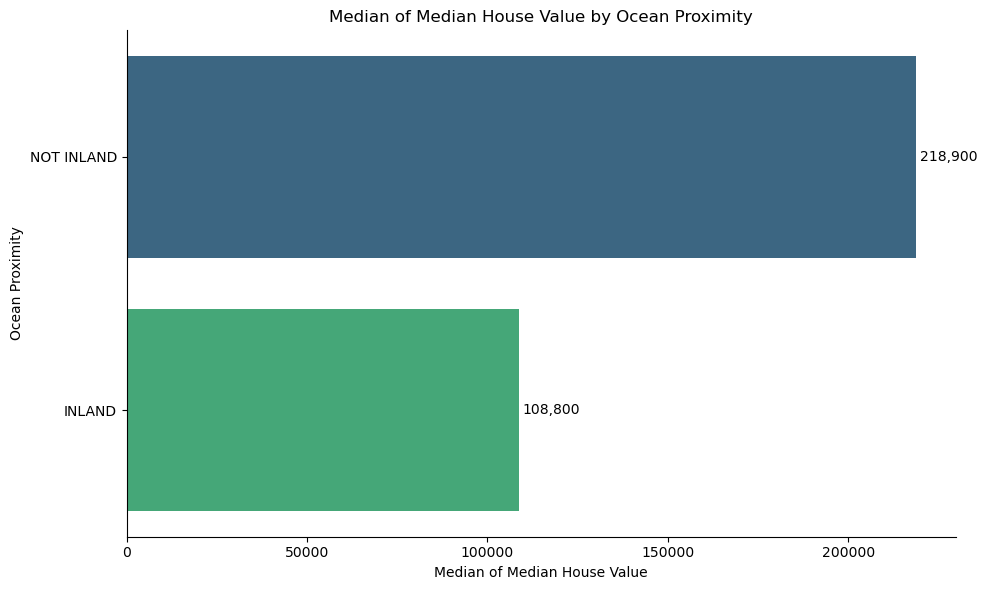

In [577]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=group_ocean.index, x=group_ocean.values, palette='viridis')

# Annotate each bar with its corresponding median house value
for i, value in enumerate(group_ocean.values):
    ax.text(value + 1000, i, f'{value:,.0f}', va='center', fontsize=10, color='black')

plt.title('Median of Median House Value by Ocean Proximity')
plt.ylabel('Ocean Proximity')
plt.xlabel('Median of Median House Value')

# Remove top and right spines
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()

Setelah merubah value ocean proximity menjadi 'INLAND' dan 'NOT INLAND' menjadi seperti ini.

In [723]:
def plotOne(df, var):
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)
    
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
    proj = gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6), subplot_kw={'projection': proj})
    
    gplt.polyplot(cali, projection=proj, ax=ax)
    gplt.pointplot(gdf, ax=ax, hue=var, cmap='viridis', legend=True, alpha=1.0, s=3)
    ax.set_title(var)
    
    plt.tight_layout()


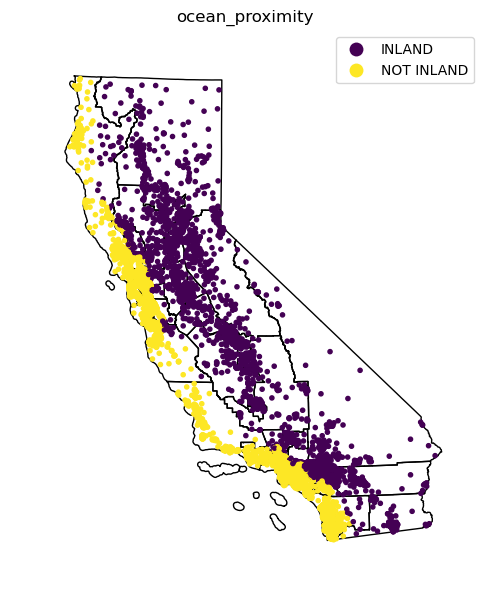

In [729]:
plotOne(data,'ocean_proximity')

Berikut adalah pemetaan distrik berdsarkan ocean_proximity setelah melakukan replace value.

## **D. Generate New Features**

In [578]:
data['population_per_household'] = data['population']/data['households']
data['room_per_household'] = data['total_rooms']/data['households']
data['bedroom_per_household'] = data['total_bedrooms']/data['households']

## **E. Remove Irrelevant Features**

Sebelum melakukan modeling diperlukan drop columns yang tidak diperlukan. Pada dataset ini ada kolom 'latitude' dan 'longitude' yang dimana kedua fitur ini tidak diperlukan dalam melakukan modeling, dikarenakan sudah ada kolom 'ocean_proximity' yang telah menjelaskan jarak  suatu district ke laut, sehingga dapat menurunkan kompleksitas dari model

In [579]:
data.drop(columns=['total_rooms', 'total_bedrooms', 'population'],inplace=True)

## **F. Handling Outliers**

In [580]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def get_outlier_counts(data):
    outlier_data = []

    numerical = [var for var in data.columns if data[var].dtype != 'object']

    for column in numerical:
        outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
        total_outlier_lower = len(outlier_result[outlier_result[column] < lower_bound])
        total_outlier_upper = len(outlier_result[outlier_result[column] > upper_bound])
        total_outliers = total_outlier_lower + total_outlier_upper
        outlier_percentage = round(total_outliers / len(data[column]) * 100, 2)
        outlier_data.append([column, lower_bound, total_outlier_lower, upper_bound, total_outlier_upper, total_outliers, outlier_percentage])

    outlier_df = pd.DataFrame(outlier_data, columns=[
        "Column", 
        "Lower Bound", 
        "Lower Bound Outliers", 
        "Upper Bound", 
        "Upper Bound Outliers", 
        "Total Outliers", 
        "Percentage (%)"
    ])
    return outlier_df

In [581]:
get_outlier_counts(data)

Column   Lower Bound  Lower Bound Outliers  \
0                 longitude   -127.500000                     0   
1                  latitude     28.245000                     0   
2        housing_median_age    -10.500000                     0   
3                households   -208.500000                     0   
4             median_income     -0.680650                     0   
5        median_house_value -97050.000000                     0   
6  population_per_household      1.144900                     3   
7        room_per_household      2.062167                    38   
8     bedroom_per_household      0.864202                   129   

     Upper Bound  Upper Bound Outliers  Total Outliers  Percentage (%)  
0    -112.300000                     0               0            0.00  
1      43.405000                     0               0            0.00  
2      65.500000                     0               0            0.00  
3    1091.500000                   834             834            5.83  
4       7.986150                   477             477            3.33  
5  480150.000000                   751             751            5.25  
6       4.562422                   485             488            3.41  
7       8.439194                   343             381            2.66  
8       1.241924                   853             982            6.86

Terdapat outlier pada kolom:
- households: 5.83%
- median_income: 3.33%
- median_house_value:5.25%
- population_per_household: 3.41%
- room_per_household: 2.66%
- bedroom_per_household: 6.86%

`Membuang outlier pada target`

In [582]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [583]:
data = remove_outliers(data, 'median_house_value')

## **G. Collinearity**

In [584]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [585]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [586]:
numerical = [var for var in data.columns if data[var].dtype != 'object']
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [587]:
dropped_columns

['longitude', 'room_per_household', 'latitude']

Terdapat multi-collinearity pada fitur 'longitude', 'room_per_household', 'latitude'. Namun akan dibiarkan dulu

In [588]:
vif_df

Feature       VIF
2             median_income  9.732374
3        median_house_value  9.411118
5     bedroom_per_household  4.593293
0        housing_median_age  4.195272
1                households  2.441719
4  population_per_household  1.183584

## **H. Cardinality**

In [589]:
categorical = [var for var in data.drop(columns='median_house_value').columns if data[var].dtypes == 'object']

In [590]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of ocean_proximity: 2


Cardinality pada ocean_proximity < 10, maka dalam melakukan encoding akan menggunakan OneHotEncoder

# **5. Modelling**

## **A. Data Preparation**

`Encoding`

Dikarenakan mesin tidak dapat mempelajari objek secara langsung, perlu dilakukan encoding untuk mengubah tipe data menjadi angka agar dapat dibaca oleh mesin

In [591]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['ocean_proximity']),
], remainder='passthrough')

`Scaler`

Menggunakan Robust Scaler dapat membuat data tidak terpengaruh oleh outlier, karena itu data ini cocok menggunakan Robust Scaler

In [592]:
# Scaling
scaler = RobustScaler()

## **B. Define Features and Target**

In [593]:
# Define Features
X = data.drop(columns='median_house_value') 

# Define Target
y = data['median_house_value']

## **C. Data Splitting**

In [594]:
# Memisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Proporsi train/test 80:20

## **D. Model Benchmarking**

In [595]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
gbr = GradientBoostingRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)


# Definisikan model-model dalam bentuk list

models = [lr, knn, dt, rf, xgb, ridge, lasso, gbr, ada]
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Ridge', 'Lasso', 'Gradient Boosting', 'AdaBoost']

# Menyimpan hasil evaluasi
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Scaler untuk pipeline
scaler = RobustScaler()

# Cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Function to calculate RMSE as a scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define custom scorers
scorers = {
    'rmse': make_scorer(rmse, greater_is_better=False),
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

# Mencari algoritma terbaik berdasarkan tiap metrics
for name, model in zip(model_names, models):
    pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring=scorers['rmse'], 
        error_score='raise'
    )

    print(f"RMSE scores for {name}: {model_cv_rmse}")

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(-model_cv_rmse.mean())  # Negate to convert from negative to positive error
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring=scorers['mae'], 
        error_score='raise'
    )

    print(f"MAE scores for {name}: {model_cv_mae}")

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(-model_cv_mae.mean())  # Negate to convert from negative to positive error
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring=scorers['mape'], 
        error_score='raise'
    )

    print(f"MAPE scores for {name}: {model_cv_mape}")

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(-model_cv_mape.mean())  # Negate to convert from negative to positive error
    nilai_std_mape.append(model_cv_mape.std())

# Membuat DataFrame hasil evaluasi
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean RMSE': nilai_mean_rmse,
    'Std RMSE': nilai_std_rmse,
    'Mean MAE': nilai_mean_mae,
    'Std MAE': nilai_std_mae,
    'Mean MAPE': nilai_mean_mape,
    'Std MAPE': nilai_std_mape
})

RMSE scores for Linear Regression: [-60508.32270079 -60630.69430625 -64338.1083083  -60261.28192204
 -62217.58970696]
MAE scores for Linear Regression: [-45085.31203765 -45816.01065565 -46249.00172305 -44462.68163977
 -46132.22960963]
MAPE scores for Linear Regression: [-0.28655398 -0.27668148 -0.28438314 -0.27402327 -0.27918627]
RMSE scores for KNN: [-55418.10397015 -55873.67408131 -55618.98735326 -54502.32856905
 -56407.64163944]
MAE scores for KNN: [-39859.44700461 -39618.22130014 -39598.46934071 -38330.79797142
 -40237.5472568 ]
MAPE scores for KNN: [-0.24618613 -0.23456806 -0.23170144 -0.2279179  -0.23350216]
RMSE scores for Decision Tree: [-65750.24367848 -66668.87580642 -64780.04864638 -63799.34684907
 -67363.17348181]
MAE scores for Decision Tree: [-44664.37834101 -45921.90041494 -44124.25080682 -43075.934071
 -45323.55970493]
MAPE scores for Decision Tree: [-0.27668978 -0.26854002 -0.25747965 -0.25125687 -0.25905567]
RMSE scores for Random Forest: [-44109.37935967 -45744.37545

In [597]:
# Tampilkan hasil
results_df.sort_values(by='Mean MAPE').reset_index(drop=True)

Model     Mean RMSE     Std RMSE      Mean MAE      Std MAE  \
0            XGBoost  42702.746613   721.846302  29110.592787   526.393117   
1      Random Forest  45389.534706  1069.578966  31053.767226   877.303372   
2  Gradient Boosting  47770.490837  1315.487942  34090.946353   925.052865   
3                KNN  55564.147123   625.952815  39528.896575   641.826911   
4      Decision Tree  65672.337692  1277.682094  44622.004668   982.018039   
5              Ridge  61589.496196  1541.178684  45543.560330   680.280350   
6              Lasso  61590.956126  1536.701484  45548.557321   677.904744   
7  Linear Regression  61591.199389  1536.342790  45549.047133   677.723834   
8           AdaBoost  68055.399246  3283.961677  57001.811644  3345.533928   

   Mean MAPE  Std MAPE  
0   0.172914  0.004464  
1   0.184579  0.004300  
2   0.204000  0.003935  
3   0.234775  0.006137  
4   0.262604  0.008958  
5   0.280036  0.004653  
6   0.280154  0.004676  
7   0.280166  0.004678  
8   0.414182  0.036801

In [598]:
top3_train = results_df[['Mean MAPE']].sort_values(by='Mean MAPE').reset_index(drop=True).head(3)
top3_train = top3_train.rename(columns={'Mean MAPE': 'Train MAPE'})

In [603]:
top3_model_name =['XGBoostRegressor', 'RandomForestRegressor','GradientBoostRegressor']
top3_model = [xgb, rf, gbr]

In [604]:
top3_model_test_results = []

for name, model in zip(top3_model_name, top3_model):
    pipeline = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    ypred_test = pipeline.predict(X_test)

    # Evaluate
    top3_model_test_results.append({
        'Model': name,
        'MAPE': mean_absolute_percentage_error(y_test, ypred_test)
    })

In [605]:
top3_model_test = pd.DataFrame(top3_model_test_results)
top3_model_test = top3_model_test.sort_values(by='MAPE').rename(columns={'MAPE': 'Test MAPE'})
top3_train_test = top3_model_test.join(top3_train)
before_tuning = top3_train_test[['Model','Train MAPE', 'Test MAPE']]
before_tuning

Model  Train MAPE  Test MAPE
0        XGBoostRegressor    0.172914   0.181333
1   RandomForestRegressor    0.184579   0.189753
2  GradientBoostRegressor    0.204000   0.209806

## **E. Hyperparameter Tuning**
Melakukan hypermeter tuning menggunakan randomized search, untuk mencari model yang memiliki error lebih kecil dibandingkan menggunakan default parameter. Iterasi yang dilakukan dalam mencari parameter adalah 100.

In [639]:
n_iter = 100

### **Random Forest Tuning**

Berdasarkan <a href="https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74">Towards Data Science</a> berikut adalah paramter yang digunakan untuk melakukan tuning Random Forest


In [640]:
# Hyperparam RF
param_distributions_rf ={
    'model__n_estimators' : list(np.arange(80, 201, 10)),
    'model__max_features' : ['sqrt','log2',None],
    'model__max_depth' : range(3,21,3),
    'model__min_samples_split': range(2, 21, 2),
    'model__min_samples_leaf': range(1, 11, 2)
}

pipeline_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', rf)
])

randomized_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_distributions_rf,
    n_iter=n_iter,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=0
)

### **XGBoost**

Berdasarkan <a href="https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e">Towards Data Science</a> berikut adalah paramter yang digunakan untuk melakukan tuning XGBoost

In [641]:
# Hyperparam  XGB
param_distributions_xgb = {
    'model__max_depth': list(np.arange(3, 13)),
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': list(np.arange(80, 201, 10)),
    'model__subsample': list(np.arange(8, 10)/10),
    'model__gamma': [0.1,5] ,
    'model__colsample_bytree': list(np.arange(8, 10)/10)
}

# Membuat algorithm chains
pipeline_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

randomized_search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_distributions_xgb,
    n_iter=n_iter,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=0
)

### **Gradient Boost**

Berdasarkan <a href="https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/">Analytics Vidhya</a> berikut adalah paramter yang digunakan untuk melakukan tuning GradientBoost




In [642]:
param_distributions_gbr = {
    'model__n_estimators' : range(10,101,10),
    'model__max_features' : ['sqrt','log2',None], 
    'model__max_depth' : range(10,101,10),
    'model__min_samples_split': range(2, 21, 2),
    'model__min_samples_leaf': range(1, 21, 2)
}

# Membuat algorithm chains
pipeline_gbr = Pipeline([
        ('preprocessing', transformer),
        ('model', gbr)
        ])

randomized_search_gbr = RandomizedSearchCV(
    estimator=pipeline_gbr,
    param_distributions=param_distributions_gbr,
    n_iter=n_iter,
    cv=KFold(n_splits=5, shuffle=True, random_state=1),
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=0
)

In [643]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return rmse, mae, mape

In [644]:
randomized_search_rf.fit(X_train, y_train)
best_rf_model = randomized_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {randomized_search_rf.best_params_}")

randomized_search_xgb.fit(X_train, y_train)
best_xgb_model = randomized_search_xgb.best_estimator_
print(f"Best parameters for XGBoost: {randomized_search_xgb.best_params_}")

randomized_search_gbr.fit(X_train, y_train)
best_gbr_model = randomized_search_gbr.best_estimator_
print(f"Best parameters for  GradientBoost: {randomized_search_gbr.best_params_}")

# Evaluasi model setelah tuning
rf_rmse_after, rf_mae_after, rf_mape_after = evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)
xgb_rmse_after, xgb_mae_after, xgb_mape_after = evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test)
gbr_rmse_after, gbr_mae_after, gbr_mape_after = evaluate_model(best_gbr_model, X_train, y_train, X_test, y_test)

# Menyimpan hasil evaluasi setelah tuning dalam DataFrame
results_after_tuning = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'GradientBoost'],
    'RMSE After Tuning': [rf_rmse_after, xgb_rmse_after, gbr_rmse_after],
    'MAE After Tuning': [rf_mae_after, xgb_mae_after, gbr_mae_after],
    'MAPE After Tuning': [rf_mape_after, xgb_mape_after, gbr_mape_after]
})


Best parameters for Random Forest: {'model__n_estimators': 130, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 18}
Best parameters for XGBoost: {'model__subsample': 0.8, 'model__n_estimators': 150, 'model__max_depth': 8, 'model__learning_rate': 0.1, 'model__gamma': 5, 'model__colsample_bytree': 0.8}
Best parameters for  GradientBoost: {'model__n_estimators': 100, 'model__min_samples_split': 20, 'model__min_samples_leaf': 15, 'model__max_features': 'log2', 'model__max_depth': 40}


In [645]:
results_after_tuning = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'XGBoostRegressor', 'GradientBoostRegressor'],
    'RMSE After Tuning': [rf_rmse_after, xgb_rmse_after, gbr_rmse_after],
    'MAE After Tuning': [rf_mae_after, xgb_mae_after, gbr_mae_after],
    'MAPE After Tuning': [rf_mape_after, xgb_mape_after, gbr_mape_after]
})

In [646]:
# Menggabungkan hasil sebelum dan sesudah tuning
results_after_tuning = results_after_tuning.sort_values(by='MAPE After Tuning')
before_after_tuning = before_tuning.merge(results_after_tuning)
before_after_tuning[['Model','Train MAPE','Test MAPE','MAPE After Tuning']].sort_values('MAPE After Tuning')

Model  Train MAPE  Test MAPE  MAPE After Tuning
0        XGBoostRegressor    0.172914   0.181333           0.168867
2  GradientBoostRegressor    0.204000   0.209806           0.171643
1   RandomForestRegressor    0.184579   0.189753           0.185940

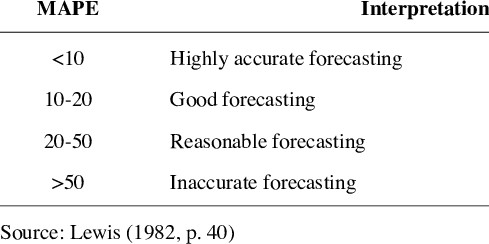

Berdasarkan indikator dari <a href="https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432">Research Gate</a> bahwa model yang sudah dituning memiliki kemampuan model peramalan baik, dikarenakan memiliki MAPE di rentang 10-20%

## **F. Explanation About Best Model Algorithm**
**Best Model :** XGBoost

XGBoost adalah sebuah perpustakaan gradient boosting yang dioptimalkan untuk efisiensi tinggi, fleksibilitas, dan portabilitas. Algoritma ini mengimplementasikan algoritma pembelajaran mesin di bawah kerangka Gradient Boosting. XGBoost menyediakan penguatan pohon paralel (juga dikenal sebagai GBDT, GBM) yang menyelesaikan banyak masalah data sains dengan cepat dan akurat.

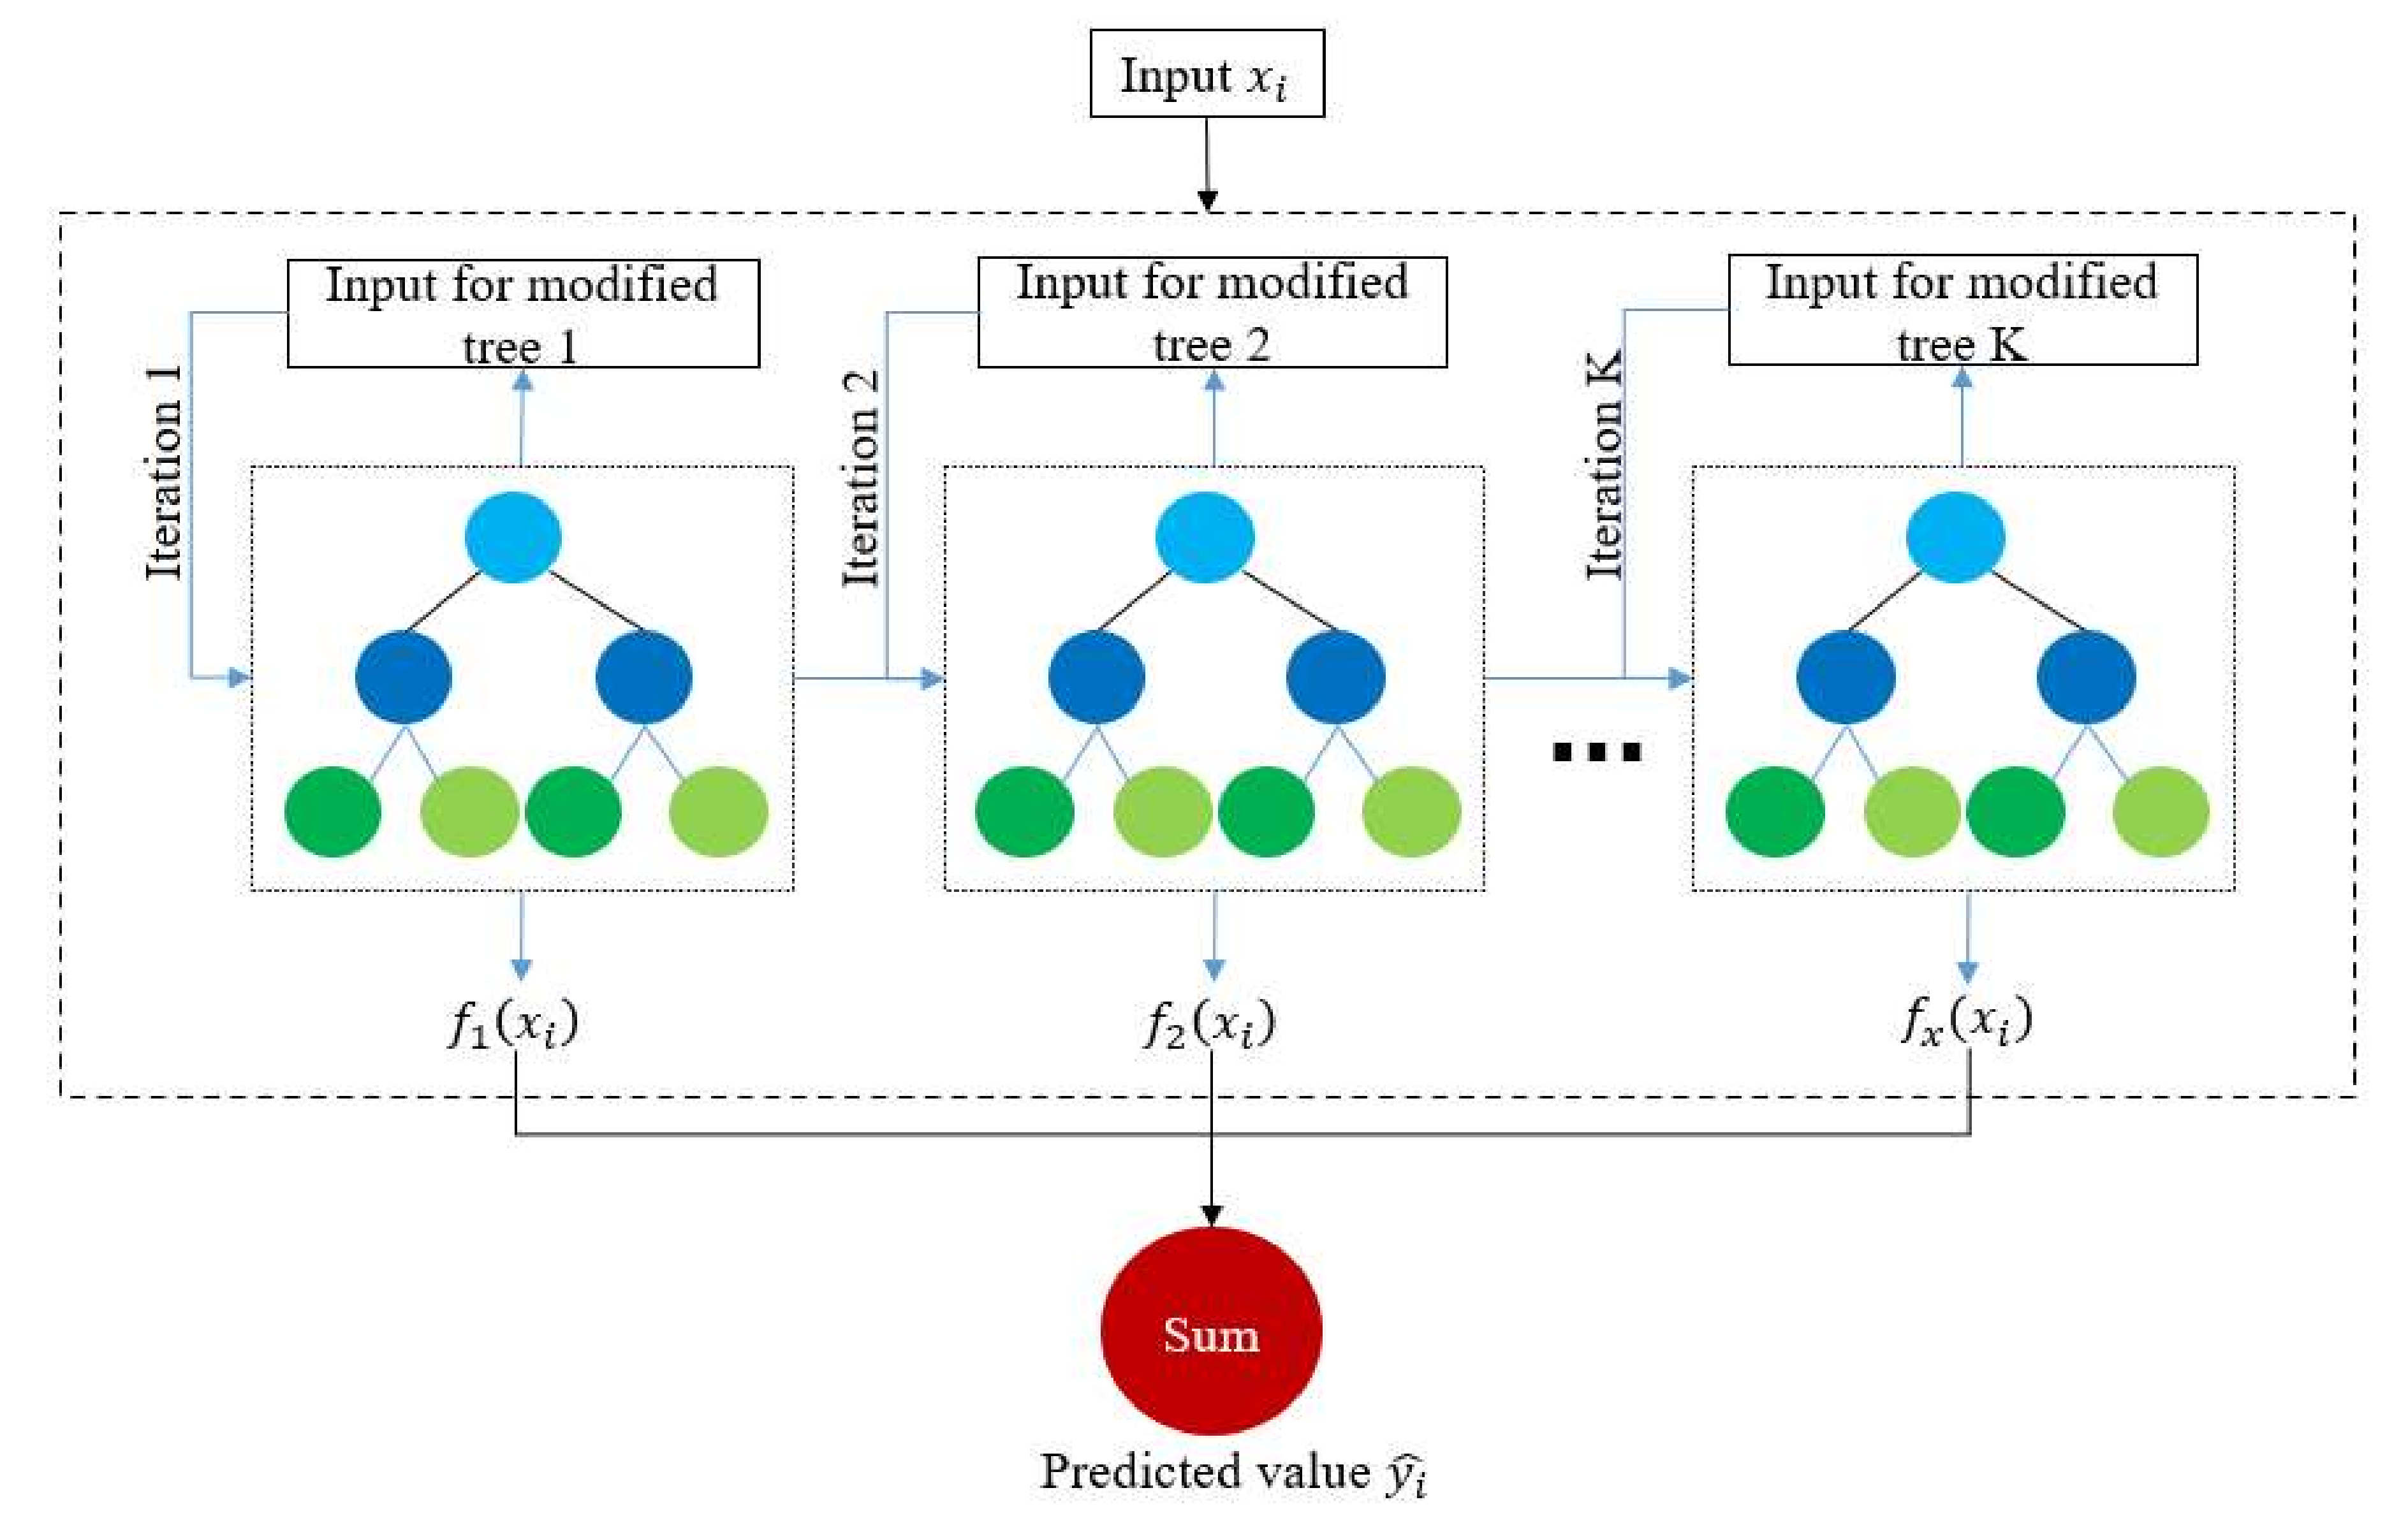

**Best Parameter**
| Parameter               | Value   |
|-------------------------|---------|
| model__subsample        | 0.8     |
| model__n_estimators     | 150     |
| model__max_depth        | 8       |
| model__learning_rate    | 0.1     |
| model__gamma            | 5       |
| model__colsample_bytree | 0.8     |


1. **Fitur Utama XGBoost**:
   - **Kecepatan dan Performa**: XGBoost dikenal karena kinerjanya yang tinggi dan efisiensi. Algoritma ini mampu menangani dataset skala besar dan model yang kompleks dengan waktu pelatihan yang cepat.
   - **Regularisasi**: XGBoost mencakup regularisasi bawaan (L1 dan L2) untuk mencegah overfitting, membuatnya lebih kuat dibandingkan dengan algoritma gradient boosting lainnya.
   - **Handling Missing Value**: XGBoost memiliki mekanisme bawaan untuk menangani nilai yang hilang, menjadikannya cocok untuk data dunia nyata di mana data mungkin tidak lengkap.
   - **Tree Pruning**: XGBoost menggunakan algoritma pemangkasan pohon yang baru, yang membantu mengontrol kompleksitas model dan menghindari overfitting dengan memangkas cabang pohon yang tidak memberikan kontribusi signifikan terhadap prediksi.
   - **Cross-Validation**: XGBoost memungkinkan cross-validation di setiap iterasi proses boosting, memungkinkan penghentian awal berdasarkan kinerja pada set validasi, sehingga menghindari overtraining.

2. **Pemodelan XGBoost**:
   XGBoost Regressor adalah versi regresi dari algoritma XGBoost yang digunakan untuk memprediksi nilai kontinu

3. **Keunggulan XGBoost Regressor**:
   - **Handling Skala Data**: XGBoost dapat bekerja dengan baik tanpa perlu melakukan scalling
   - **Pengurangan Overfitting**: Dengan menggunakan regularisasi dan pemangkasan pohon, XGBoost mampu mengurangi risiko overfitting, memastikan model yang lebih generalis dan robust.
   - **Kinerja Tinggi**: XGBoost menggabungkan kecepatan, akurasi, dan efisiensi, membuatnya sangat efektif untuk berbagai jenis data dan masalah prediksi.
   - **Fleksibilitas**: XGBoost dapat digunakan untuk berbagai masalah prediksi, baik itu regresi, klasifikasi, maupun permasalahan ranking.

4. **Aplikasi Praktis**:
   XGBoost Regressor sangat cocok untuk berbagai aplikasi prediktif, termasuk prediksi harga, estimasi permintaan, analisis risiko, dan banyak lagi. Dalam kasus Anda, model ini telah terbukti menjadi algoritma terbaik berdasarkan evaluasi metrik kinerja yang digunakan.

## **G. Learning Curve**

`XGBoost Regressor`

In [662]:
final_model = randomized_search_xgb.best_estimator_
final_estimator = randomized_search_xgb.best_params_

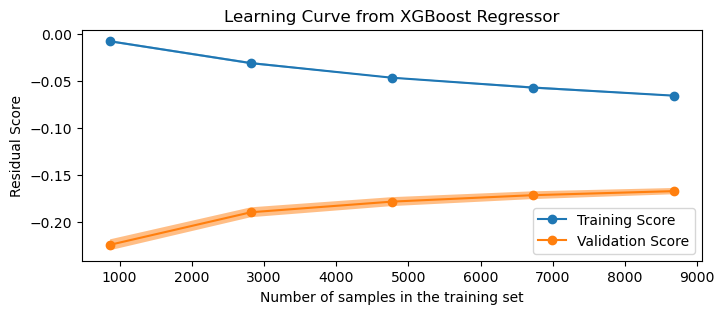

In [663]:
# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "scoring": 'neg_mean_absolute_percentage_error'
}

LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title('Learning Curve from XGBoost Regressor')
ax.set_ylabel('Residual Score')

plt.show()


Gambar tersebut memperlihatkan kurva pembelajaran dari XGBoost Regressor, menggambarkan peningkatan kinerja model machine learning dengan bertambahnya data pelatihan.

Pada grafik tersebut, skor pelatihan menunjukkan performa model pada data pelatihan, sedangkan skor validasi mencerminkan performa model pada data yang tidak digunakan dalam pelatihan untuk mengukur generalisasi model.

Kurva pembelajaran menunjukkan tren positif dimana skor pelatihan stabil namun skor validasi terus meningkat seiring peningkatan jumlah data. Perbedaan antara skor pelatihan dan skor validasi, yang sekitar 6% MAPE, menunjukkan adanya potensi overfitting pada data pelatihan. Overfitting dapat diatasi dengan memperluas dataset pelatihan atau menggunakan teknik regularisasi.

Meskipun terdapat potensi overfitting, dengan MAPE kurang dari 20%, model ini memiliki performa yang baik dan dapat dipertimbangkan untuk digunakan dalam aplikasi praktis. Jumlah contoh pelatihan yang optimal adalah sekitar 7.000, di mana model mulai cocok secara optimal dengan data pelatihan.

Secara keseluruhan, kurva pembelajaran menunjukkan bahwa XGBoost Regressor mampu belajar dengan baik dari data pelatihan. Selain itu, perbedaan kecil antara skor pelatihan dan skor validasi menunjukkan bahwa model tidak terlalu cocok dengan data pelatihan, yang merupakan indikasi yang baik untuk generalisasi model ke data baru.

## **H. Feature Importance**

In [664]:
numerical = ['longitude', 'latitude', 'housing_median_age', 'households', 
             'median_income', 'bedroom_rate', 'population_per_household', 
             'room_per_household']
categorical = ['ocean_proximity']

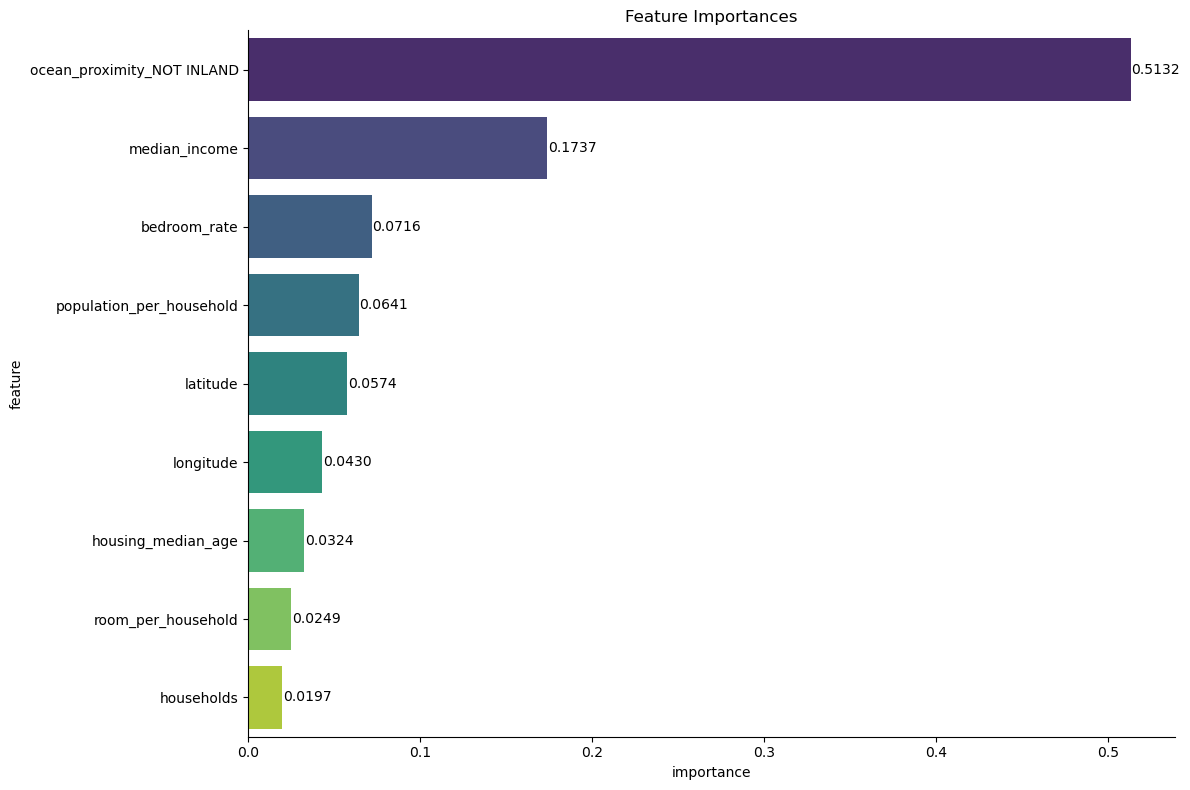

In [665]:
xgb_model = best_xgb_model.named_steps['model']
feature_importances = xgb_model.feature_importances_
preprocessor = pipeline_xgb.named_steps['preprocessing']
ohe = preprocessor.named_transformers_['onehot']
# Ambil nama fitur dari data kategorikal
feature_names = ohe.get_feature_names_out(categorical)
# Gabungkan dengan nama fitur numerik
feature_names = np.append(feature_names, numerical)

# Buat DataFrame untuk mempermudah visualisasi
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)



plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')

# Annotate the bars with the feature importance values
for i in ax.patches:
    ax.annotate(format(i.get_width(), '.4f'), 
                (i.get_width(), i.get_y() + i.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (18, 0), 
                textcoords = 'offset points')

sns.despine()


plt.title('Feature Importances')
plt.tight_layout()
plt.show()

`Analisis Features Importances:`

ocean_proximity_NOT INLAND (0,5132):
- Fitur ini memiliki tingkat kepentingan paling tinggi, artinya fitur ini merupakan prediktor paling berpengaruh dalam model. Properti yang terletak di 'NOT INLAND' mempunyai dampak signifikan terhadap 'median_house_value'.

median_income (0,1737):
- Fitur ini adalah yang terpenting kedua. Hal ini menunjukkan bahwa 'median_income' di suatu distrik merupakan prediktor kuat terhadap variabel target.

bedroom_rate (0,0716):
- Fitur ini cukup penting. Hal ini menunjukkan bahwa 'bedroom_rate' memiliki dampak terhadap 'median_house_value'.

population_per_household (0,0641):
- Fitur ini cukup penting. Hal ini menunjukkan bahwa 'population_per_household' memiliki dampak terhadap 'median_house_value'.

latitude (0,0574) dan longitude (0,0430):
- Koordinat geografis ini mempunyai pengaruh terhadap model. Faktor yang berhubungan dengan lokasi dapat mempengaruhi harga rumah.

housing_median_age(0.0324), room_per_household(0.0249), household (0,0197):
- Ketiga fitur ini tidak terlalu berdampak terhadap model.

In [666]:
X_train_processed = final_model[0].fit_transform(X_train)
X_test_processed = final_model[0].fit_transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

**Shapley Value of Explanations (SHAP)**

ExactExplainer explainer: 10847it [11:37, 15.30it/s]                           


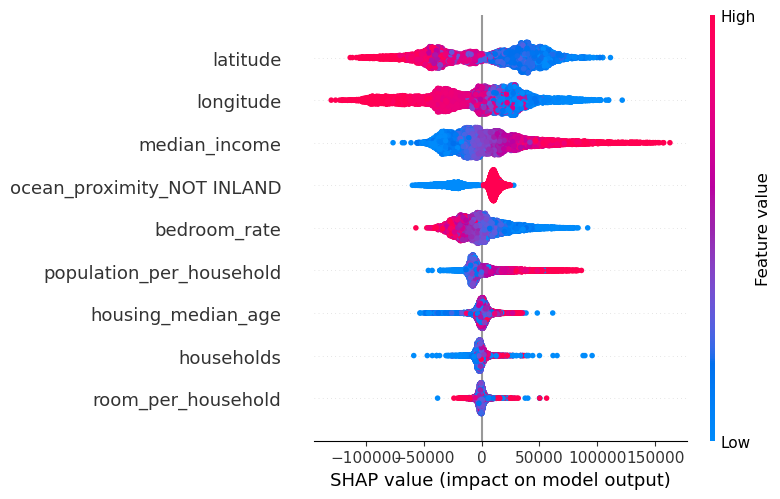

In [667]:
import shap


model = final_model[-1] 

explainer = shap.Explainer(model.predict, X_train_processed)

shap_values = explainer(X_train_processed)
plt.figure(figsize=(20, 6)) 

shap.summary_plot(shap_values, X_train_processed, feature_names=feature_names)


Berikut adalah penjelasan yang dapat dibuat dari SHAP:

- Latitude: Nilai lintang yang lebih tinggi (lebih ke utara) cenderung memiliki dampak negatif pada median house value dan lebih ke selatan memberikan dampak positif.
- Longitude: Nilai bujur yang lebih tinggi (lebih ke barat) cenderung memiliki dampak negatif pada median house value dan lebih ke tidur memberikan dampak positif.
- Median Income: Pendapatan median yang lebih tinggi cenderung memiliki dampak positif pada median house value.
- Ocean Proximity (NOT INLAND): Dekat dengan laut cenderung memiliki dampak positif pada median house value, sebaliknya jika merupakan INLAND maka akan memberikan dampak negatif pada model.
- Bedroom Rate: Dampak tingkat kamar tidur yang semakin rendah cenderung memberikan dampak positif pada median house value.
- Population per household: Dampak populasi per rumah tangga pada median house value tidak jelas dari grafik.
- housing_median_age: Dampak usia median rumah pada median house value tidak jelas dari grafik.
- Households: Dampak jumlah rumah tangga pada median house value tidak jelas dari grafik.
- Room per household: Dampak kamar per rumah tangga pada median house value tidak jelas dari grafik.

**Shapley Value of Explanations (SHAP) Per Observation Feature**

In [668]:
# Start js (must have)
shap.initjs()

In [669]:
onehot_features = list(final_model[0].transformers_[0][1].get_feature_names_out())
remainder_features = list(X.columns[final_model[0].transformers_[1][2]])


In [670]:
feature_names = onehot_features + remainder_features


In [674]:
def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

`Data test index 1000`

In [677]:
# Lets compare with the real result
print(f"The prediction value of this median house value: {y_pred[1000]}")
print(f"The Actual value of this median house value: {y_test.iloc[1000]}")

shap_plot(1000,final_model[-1],X_test_processed_df)

The prediction value of this median house value: 233873.234375
The Actual value of this median house value: 219900.0


Yang membuat harga median rumah menjadi 221.708 adalah:
1. Membuat harga naik:
- ocean_proximity_NOT_INLAND = 1, maka berada di deket laut
- longitude = -119.3
- latitude = 34.42
- households = 1.026
2. Membuat harga turun:
- population_per_household =5.549
- bedroom_rate = 2

**Local Interpretable Model-agnostic Explanations (LIME)**

In [671]:
import lime
from lime import lime_tabular

In [678]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed,  # Use the preprocessed training data
    feature_names=feature_names,
    mode='regression'
)

The actual value for this instance is: 219900.0
The Predicted value for this instance is: 233873.234375


''

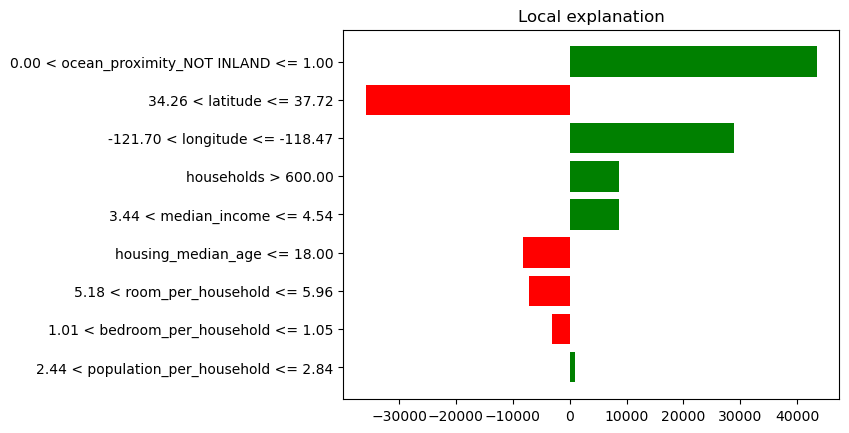

In [689]:
print(f"The actual value for this instance is: {y_test.iloc[1000]}")
print(f"The Predicted value for this instance is: {y_pred[1000]}")

exp = explainer.explain_instance(X_test_processed_df.iloc[1000], 
                                 final_model[-1].predict)
exp.as_pyplot_figure()
;

In [706]:
# Lets compare with the real result
print(f"The median house value actual: {y_test.iloc[1000]}")
print(f"The median house value prediction: {y_pred[1000]}")

exp = explainer.explain_instance(
    data_row=X_test_processed_df.iloc[1000], 
    predict_fn=final_model[-1].predict
)

exp.show_in_notebook(show_table=True)

The median house value actual: 219900.0
The median house value prediction: 233873.234375


Berdasarkan grafik LIME dapat dilihat bahwa:
1. Harga Medain Rumah Meningkat:
- Di dekat laut 
- longitude diantara (-121.70) - (-118.47)
- households > 600 
- population_per_household diantara 2.44-2.84
- median income antara 3.44 - 4.54
2. Harga Medain Rumah Menurun:
- latitude diantara (34.26) - (37.72) 
- housing_median_age < 18 
- room_per_household diantara 5.18 - 5.96
- bedroom_per_household 1.01 - 1.05


## **H. Residual Plot**

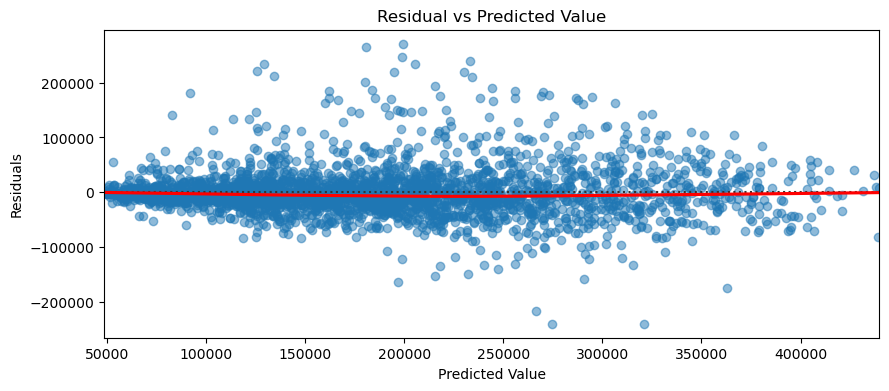

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 4))
plot = sns.residplot(
    x=y_pred,
    y=residuals,
    lowess=True,                           
    scatter_kws={'alpha': 0.5},
    line_kws={'color':'red'}             
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

plt.show()

**Interpretasi Plot Residual:**

Plot residual menunjukkan bahwa residual tidak tersebar secara acak di sekitar garis horizontal. Ada **pola lengkung**, yang menunjukkan bahwa kesalahan model tidak independen dari nilai prediksi rumah yang diprediksi. Ini berarti model mungkin undervalue atau overvalue untuk rentang nilai rumah yang diprediksi tertentu.

## **I. Actual vs Predicted Probability**

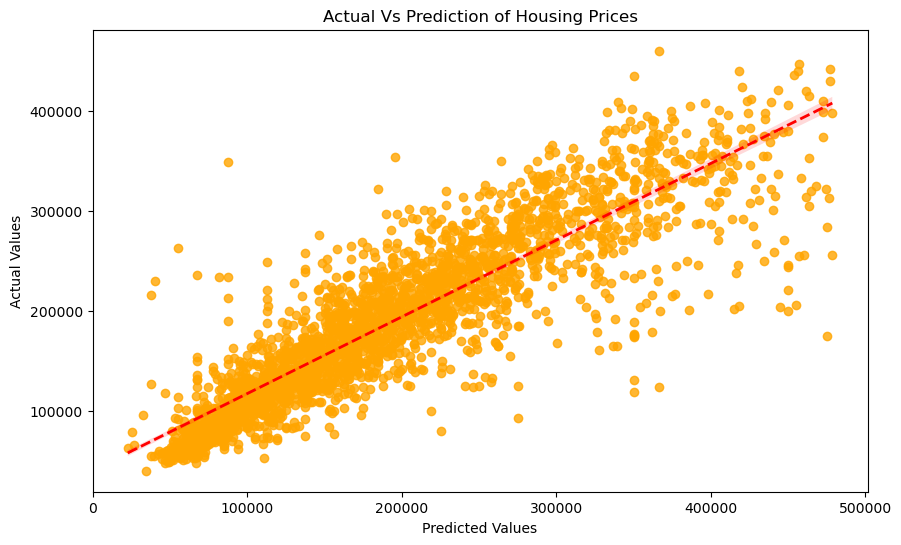

In [698]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred, color='orange', ax=ax, line_kws={'color':'red', 'lw':2, 'alpha':1, 'ls':'--'})

ax.set_title('Actual Vs Prediction of Housing Prices')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

**Analisis Plot Residual:**

Dari plot residual yang dihasilkan, terlihat adanya **pola tertentu**, terutama pada nilai prediksi yang lebih tinggi. Hal ini menunjukkan bahwa **model mungkin memiliki bias atau residual yang berkorelasi dengan nilai prediksi**.

**Implikasi:**

Pola ini menunjukkan bahwa model cenderung melakukan kesalahan yang lebih besar dalam memprediksi harga rumah yang lebih tinggi. Hal ini mengindikasikan adanya keterbatasan dalam kemampuan model untuk memprediksi dengan akurat di semua rentang harga.

## **J. Cost Benefit Analysis**

Membandingkan keuntungan yang didapatkan perusahaan jika menggunakan Machine Learning dan jika tidak menggunakannya. Pada proses penghitungan biaya mengguanakan perhitungan 400 rumah yang didapatkan berdasarkan median nilai household dengan asumsi bahwa setiap household memiliki 1 rumah.

### 1. Without Machine Learning (Menggunakan Home appraisal)

**Home Appraisal:**
- **Jumlah Rumah/Bulan:** 400
- **Rumah yang Dapat Dinilai oleh Setiap Home Appraiser per Bulan:** 3
- **Biaya per Penilaian Rumah:** USD 1.000
- **Total Biaya Penilaian per Bulan:** USD 3.000
- **Jumlah Home Appraiser yang Dibutuhkan:** 133
- **Total Biaya per Bulan untuk Home appraisal:** USD 400.000

**Total Biaya:** USD 400.000

**Pendapatan dari Jasa Penilaian Rumah:**
- **Harga Jasa Penilaian per Rumah:** USD 1.200
- **Total Pendapatan per Bulan:** USD 480.000

**Keuntungan:**
- **Total Keuntungan per Bulan:** USD 80.000
- **Margin Keuntungan:** 16.67%

### 2. With Machine Learning

**Pengembangan dan Pemeliharaan Machine Learning:**
- **Biaya Pengembangan Awal:** USD 100.000
- **Biaya Pemeliharaan per Bulan:** USD 10.000

**Biaya per Penilaian Rumah Menggunakan Machine Learning:**
- **Biaya per Penilaian Rumah:** USD 100
- **Total Biaya Penilaian per Bulan:** USD 40.000

**Total Biaya:** USD 150.000

**Pendapatan dari Jasa Penilaian Rumah:**
- **Harga Jasa Penilaian per Rumah:** USD 1.200
- **Total Pendapatan per Bulan:** USD 480.000

**Keuntungan:**
- **Total Keuntungan per Bulan:** USD 330.000
- **Margin Keuntungan:** 68.75%

`Kelebihan & Kekurangan`

**Home appraisal:**

**Keuntungan:**
1. **Akurasi dan Keahlian Manusia:** Home appraisal dapat memberikan penilaian yang lebih mendalam dengan mempertimbangkan faktor-faktor yang mungkin tidak terdeteksi oleh algoritma.
2. **Kepercayaan dan Transparansi:** Penilaian oleh manusia dapat lebih dipercaya oleh beberapa klien karena dilakukan oleh profesional yang berlisensi.
3. **Penanganan Kasus Kompleks:** Home appraisal dapat lebih efektif dalam menangani kasus penilaian yang kompleks atau unik yang mungkin tidak sesuai dengan model statistik.

**Kekurangan:**
1. **Biaya Tinggi:** Biaya per penilaian rumah menggunakan home appraisal sangat tinggi (USD 1.000 per rumah).
2. **Waktu Proses:** Penilaian oleh home appraisal memakan waktu lebih lama (6-20 hari kerja), memperlambat proses jual beli.
3. **Kapasitas Terbatas:** Setiap home appraiser hanya dapat menilai beberapa rumah per bulan, sehingga membutuhkan banyak tenaga kerja untuk memenuhi permintaan.

**Machine Learning:**

**Keuntungan:**
1. **Biaya Rendah:** Biaya penilaian menggunakan machine learning jauh lebih rendah (USD 100 per rumah).
2. **Kecepatan:** Penilaian dapat dilakukan secara instan, mempercepat proses jual beli rumah.
3. **Skalabilitas:** Machine learning dapat menangani jumlah penilaian yang jauh lebih besar tanpa memerlukan tambahan tenaga kerja.
4. **Konsistensi:** Algoritma memberikan hasil yang konsisten dan tidak dipengaruhi oleh bias manusia.

**Kekurangan:**
1. **Keterbatasan Model:** Algoritma mungkin tidak dapat menangkap semua faktor yang mempengaruhi nilai rumah, terutama yang bersifat subjektif atau unik.
2. **Memerlukan Lebih Banyak Data:** Implementasi awal memerlukan investasi dalam pengembangan dan pemeliharaan model.
3. **Kepercayaan Klien:** Beberapa klien mungkin kurang percaya pada hasil yang diberikan oleh algoritma dibandingkan penilaian oleh profesional yang berlisensi.

## **K. Model Limitation**

Model hanya dapat digunakan jika tidak melewati batasan model yang ada, yaitu:
1. **Longitude dan Latitude**:
   - Rentang nilai longitude harus berada antara -124.35 dan -114.31, dan rentang nilai latitude harus berada antara 32.54 dan 41.95. Ini memastikan bahwa data hanya mencakup wilayah geografis California.

2. **Housing Median Age**:
   - Rentang nilai umur median rumah harus antara 2 dan 52 tahun. Ini memastikan bahwa data hanya mencakup umur rumah yang wajar untuk rumah di California.

3. **Households**:
   - Jumlah rumah tangga dalam suatu distrik tidak boleh lebih rendah dari 2 rumah tangga dan tidak boleh lebih tinggi dari 6082 rumah tangga. 

4. **Median Income**:
   - Median income rumah tangga harus berada dalam rentang antara 0.5 dan 15.

5. **Population per Household**:
   - Jumlah penduduk per rumah tangga harus berada dalam rentang antara 0.75 dan 599.

6. **Room per Household**:
   - Rasio jumlah kamar per rumah tangga harus berada dalam rentang antara 0.85 dan 132.5.

7. **Bedroom per Household**:
   - Rasio jumlah kamar tidur per rumah tangga harus berada dalam rentang antara 0.33 dan 34.1. 


# **6. Conclusion and Recomendation**

## **A. Conclusion**

Pemanfaatan machine learning untuk memprediksi median house value di California tahun 1990 memberikan beberapa keuntungan signifikan. Berdasarkan analisis cost-benefit yang telah dilakukan, penggunaan model machine learning menghasilkan pengurangan biaya yang substansial serta peningkatan efisiensi dalam proses penilaian rumah. Implementasi machine learning dapat memberikan keuntungan besar, terutama dalam hal biaya dan kecepatan, sambil tetap mempertimbangkan cara untuk mengatasi keterbatasannya.

Pemodelan yang dilakukan menggunakan algoritma **XGBoostRegressor** berhasil mencapai nilai **Mean Absolute Percentage Error (MAPE) sebesar 16%** dalam memprediksi median house value. Ini berarti model memiliki tingkat kesalahan sebesar 16% dalam prediksinya. Analisis menunjukkan bahwa fitur yang paling berpengaruh dalam memprediksi median harga rumah adalah **'ocean_proximity_NOT INLAND'** dan **'median_income'**.


## **B. Recomendation**

### **i. Model**


Pemodelan yang dilakukan saat ini telah menghasilkan features importance yang didapatkan dari algoritma XGBoost dimana hal tersebut dapat menjadi sebuah insight untuk pengembang selanjutnya untuk menghapus fitur yang tidak relevan pada target untuk menghasilkan model yang baik.

### **ii. Business**

Pada perusahaan sebaiknya mencoba mengumpulkan data baru yang mungkin saja bisa menjadi sebuah fitur penting untuk memprediksi harga median rumah, dan juga tidak perlu mengambil data yang tidak menjadi fitur penting dalam model saat ini untuk kedepannya.

# **Saving Model**

`Pickle`

In [730]:
import pickle

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('xgboost_california_housing_price.sav', 'wb'))